#Athens University of Economics and Business
##MSc in Business Analytics (Part-Time 2020-2021)

###Machine Learning And Content Analytics

####George Mantzos (p2822012)
####Ioannis Dimitriou (p2822006)

#####August 2021

##**Connect to Google Drive in order to retrieve the uploaded data**

The data are uploaded and can be reached in the following link:

https://drive.google.com/drive/folders/1_N2fn1KJj5JAnOMybS-brhghULbOTXUB?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


There are Data about:


1.   **Argument Labeling**:     *'dataset_aueb_argument_v3.json'*
2.   **Structure Labeling**:    *'dataset_aueb_structure_v2.json'*
3.   **Citance Labeling**:      *'dataset_aueb_citations_v2.json'*



#**1. Intuitive Baseline**
### **a. Exploratory Data Analysis**
#### Argument Labeling Data





# Load Dataset

* The resulting dataset has one abstract per row. 
* The sentences and the labels are list items.
* For the Argument Labeling we have more data from the sample one, which were provided, so they will also be used.
* Both datasets will be loaded individually and they will be merged when they have the appropriate form.



In [2]:
import json
import pandas as pd

label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data_argument1 = load_corpus('/content/drive/MyDrive/ML_PROJECT/Data/dataset_aueb_argument_v3.json')
print(f'Dataset length: {len(data_argument1)} abstracts')
data_argument1.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels
863,doi: 10.1515/bmt-2017-0069,[Head phantoms for electroencephalography and ...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
449,doi: 10.1038/s41558-019-0684-5,"[A topography of climate change research, The ...","[NEITHER, NEITHER, CLAIM, NEITHER, EVIDENCE, N..."
747,doi: 10.1160/th16-09-0716,[Obesity/insulin resistance rather than liver ...,"[NEITHER, NEITHER, NEITHER, NEITHER, EVIDENCE,..."
786,doi: 10.1186/s12879-016-1510-6,[Soluble CD14 in cerebrospinal fluid is associ...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
374,doi: 10.1029/2019ms002010,[Presentation and Evaluation of the IPSL‐CM6A‐...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."


In [3]:
data_argument2 = load_corpus('/content/drive/MyDrive/ML_PROJECT/Data/dataset.json')
print(f'Dataset length: {len(data_argument2)} abstracts')
data_argument2.sample(5)

Dataset length: 1669 abstracts


,document,sentences,labels
3,DEI_G2B1_31.txt,[Relationship of gender differences in prefere...,"[NONE, NONE, NONE, NONE, NONE, EVIDENCE, CLAIM]"
559,ABC_G1B1_10.1016 j.jclepro.2019.119080.txt,[Solutions for improving the energy efficiency...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
677,ABC_G1B3_10.1016_j.jclepro.2018.02.081.txt,[The role of microorganisms in achieving the s...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, EVI..."
1606,19900212,"[A randomized, 36-month, post-marketing effica...","[NONE, NONE, NONE, NONE, NONE, NONE, NONE, EVI..."
596,ABC_G1B1_Corpus ID 214294771.txt,[Africa and the 2030 Sustainable Energy Goal: ...,"[NONE, NONE, NONE, NONE, NONE, EVIDENCE, NONE,..."


## Split Documents
For the cases we want the sentences separated, the following splits the documents. I keep the same document index in a new column in order to re-group the sentences to a document (e.g., after predictions).

In [4]:
#@title Split to sentences
sentences1 = data_argument1['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences1.head()

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...


In [5]:
sentences2 = data_argument2['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences2.head()

,doc_id,sentence
0,0,Gender Differences in Anxiety and Depression b...
1,0,Abstract
2,0,Background/aims: The aim of this prospective s...
3,0,"Methods: AUD severity, state and trait anxiety..."
4,0,Follow-up assessments were performed at 6 and ...


In [6]:
#@title and the corresponding labels
labels1 = data_argument1['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels1.head()

,doc_id,label
0,0,NEITHER
1,0,NEITHER
2,0,NEITHER
3,0,NEITHER
4,0,NEITHER


In [7]:
#@title and the corresponding labels
labels2 = data_argument2['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels2.head()

,doc_id,label
0,0,NONE
1,0,NONE
2,0,NONE
3,0,NONE
4,0,NONE


In [8]:
#@title Regroup document using doc_id
doc0_sents1 = sentences1.query('doc_id==0')['sentence']
doc0_labels1 = labels1.query('doc_id==0')['label']
for label, sent in zip(doc0_labels1, doc0_sents1):
    print(f'{str(label):5s} {sent}')

NEITHER Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment
NEITHER Importance Visual assessment of amyloid positron emission tomographic (PET) images has been approved by regulatory authorities for clinical use.
NEITHER Several immunoassays have been developed to measure β-amyloid (Aβ) 42 in cerebrospinal fluid (CSF).
NEITHER The agreement between CSF Aβ42 measures from different immunoassays and visual PET readings may influence the use of CSF biomarkers and/or amyloid PET assessment in clinical practice and trials.
NEITHER Objective To determine the concordance between CSF Aβ42 levels measured using 5 different immunoassays and visual amyloid PET analysis.
NEITHER Design, Setting, and Participants The study included 262 patients with mild cognitive impairment or subjective cognitive decline from the Swedish BioFINDER (Biomarkers for Identifying Neurodegenerative Disorders Early and Reliably) cohort (recruited from September 

In [9]:
#@title Regroup document using doc_id
doc0_sents2 = sentences2.query('doc_id==0')['sentence']
doc0_labels2 = labels2.query('doc_id==0')['label']
for label, sent in zip(doc0_labels2, doc0_sents2):
    print(f'{str(label):5s} {sent}')

NONE  Gender Differences in Anxiety and Depression before and after Alcohol Detoxification: Anxiety and Depression as Gender-Related Predictors of Relapse
NONE  Abstract
NONE  Background/aims: The aim of this prospective study was to estimate gender differences in anxiety, depression, and alcohol use severity among patients with alcohol use disorder (AUD) before and after detoxification program and within 12 months after discharge.
NONE  Methods: AUD severity, state and trait anxiety, and depression were assessed in 187 patients entering an inpatient alcohol detoxification program.
NONE  Follow-up assessments were performed at 6 and 12 months after discharge.
NONE  A between- and within-subjects analyses explored gender differences.
NONE  The predictive value of anxiety and depression for alcohol relapse was analyzed by logistic and linear regression in both genders.
NONE  Results: Females had higher levels of anxiety and depression than males both at admission and after discharge.
EVI

* The two datasets are now in form that can be merged into one dataframe.
* Before doing that we have to **add the total amount of documents of the first dataset to each Document ID of the second one.** 

In [10]:
print(f'Dataset 1 length: {len(data_argument1)} abstracts')
print(f'Dataset 2 length: {len(data_argument2)} abstracts')
data_arg1_len = len(data_argument1)
sentences2.doc_id = sentences2.doc_id + data_arg1_len
labels2.doc_id = labels2.doc_id + data_arg1_len

print(f'Dataset 1 Minimum Document ID: {sentences1.doc_id.min()}')
print(f'Dataset 1 Maximum Document ID: {sentences1.doc_id.max()}')
print(f'Dataset 2 Minimum Document ID: {sentences2.doc_id.min()}')
print(f'Dataset 2 Maximum Document ID: {sentences2.doc_id.max()}')

Dataset 1 length: 1017 abstracts
Dataset 2 length: 1669 abstracts
Dataset 1 Minimum Document ID: 0
Dataset 1 Maximum Document ID: 1016
Dataset 2 Minimum Document ID: 1017
Dataset 2 Maximum Document ID: 2685


* Also the labels datasets have a slight difference which should be corrected before merging tha datasets into one.
* The first label dataseT has as labels **"CLAIM", "EVIDENCE", "NEITHER"**.
* The second label dataseT has as labels **"CLAIM", "EVIDENCE", "NONE"**.
* So, we are going to convert the "NONE" label to "NEITHER".

In [11]:
labels2.label[labels2['label'] == 'NONE'] = 'NEITHER'
labels2.label[labels2['label'] == 'NONE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Series([], Name: label, dtype: object)

In [12]:
#@title First for the Sentences
sentences = sentences1.append(sentences2).reset_index(drop = True)
sentences

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...
...,...,...
31999,2685,No statistically significant difference in con...
32000,2685,Latanoprost 0.005% once daily reduced IOP more...
32001,2685,Latanoprost had no statistically or clinically...
32002,2685,There was no difference in hyperemia between t...


In [13]:
#@title Then for the Labels
labels = labels1.append(labels2).reset_index(drop = True)
labels

,doc_id,label
0,0,NEITHER
1,0,NEITHER
2,0,NEITHER
3,0,NEITHER
4,0,NEITHER
...,...,...
31999,2685,EVIDENCE
32000,2685,NEITHER
32001,2685,CLAIM
32002,2685,CLAIM


> Check that the merging was successful. 

In [14]:
print(f'Total Number of "NEITHER" in First Dataset: {labels1.label[labels1["label"] == "NEITHER"].value_counts()[0]}')
print(f'Total Number "NEITHER" in Second Dataset: {labels2.label[labels2["label"] == "NEITHER"].value_counts()[0]}')
print(f'Total Number of "NEITHER" in both Datasets: {labels1.label[labels1["label"] == "NEITHER"].value_counts()[0] +\
                                                     labels2.label[labels2["label"] == "NEITHER"].value_counts()[0]}')
print()
print(f'Total Number of "NEITHER" in the new Dataset: {labels.label[labels["label"] == "NEITHER"].value_counts()[0]}')

Total Number of "NEITHER" in First Dataset: 7827
Total Number "NEITHER" in Second Dataset: 14548
Total Number of "NEITHER" in both Datasets: 22375

Total Number of "NEITHER" in the new Dataset: 22375


In [15]:
print(f'Total Number of "CLAIM" in First Dataset: {labels1.label[labels["label"] == "CLAIM"].value_counts()[0]}')
print(f'Total Number "CLAIM" in Second Dataset: {labels2.label[labels["label"] == "CLAIM"].value_counts()[0]}')
print(f'Total Number of "CLAIM" in both Datasets: {labels1.label[labels1["label"] == "CLAIM"].value_counts()[0] + labels2.label[labels2["label"] == "CLAIM"].value_counts()[0]}')
print()
print(f'Total Number of "CLAIM" in the new Dataset: {labels.label[labels["label"] == "CLAIM"].value_counts()[0]}')

Total Number of "CLAIM" in First Dataset: 1048
Total Number "CLAIM" in Second Dataset: 1450
Total Number of "CLAIM" in both Datasets: 3419

Total Number of "CLAIM" in the new Dataset: 3419


In [16]:
print(f'Total Number of "EVIDENCE" in First Dataset: {labels1.label[labels["label"] == "EVIDENCE"].value_counts()[0]}')
print(f'Total Number "EVIDENCE" in Second Dataset: {labels2.label[labels["label"] == "EVIDENCE"].value_counts()[0]}')
print(f'Total Number of "EVIDENCE" in both Datasets: {labels1.label[labels1["label"] == "EVIDENCE"].value_counts()[0] +\
                                                      labels2.label[labels2["label"] == "EVIDENCE"].value_counts()[0]}')
print()
print(f'Total Number of "EVIDENCE" in the new Dataset: {labels.label[labels["label"] == "EVIDENCE"].value_counts()[0]}')

Total Number of "EVIDENCE" in First Dataset: 1700
Total Number "EVIDENCE" in Second Dataset: 2260
Total Number of "EVIDENCE" in both Datasets: 6210

Total Number of "EVIDENCE" in the new Dataset: 6210


# Data Cleansing
## Title Removal
> * First of all, we know that the first sentence of each Document is their title.
> * It can produce some bias to our model, as it will always have the label **'NEITHER'**. 
> * So there will be 2585 such labels more than they actually exist in the dataset.
> * In order to do so, we will add 3 more columns in both dataframes.
>> 1.   **Sentences_Per_Doc**: Showing the number of sentences in each Document.
>> 2.   **Sentences_Id**: Actually the index of each Sentence.
>> 3.   **In_Doc_Sentence_Id**: The internal Id for any sentence in each Document, taking values from 0 to the "Sentences_Per_Doc" value of each document.
> * After that, all sentences and labels having 'In_Doc_Id' equal to zero(0) will be dropped. 

For space and time economy, this procedure will take place in parallel for sentences and labels.







In [17]:
#@title Sentences_Per_Abstract
sentences_per_abstract = sentences.doc_id.value_counts()
sentences_per_abstract = sentences_per_abstract.sort_index()
sentences_per_abstract

0       17
1       16
2        6
3       11
4        7
        ..
2681     5
2682    12
2683    11
2684    12
2685    15
Name: doc_id, Length: 2686, dtype: int64

In [18]:
import pandas as pd
d = {'doc_id': sentences_per_abstract.index, 
     'Sentences_Per Doc': sentences_per_abstract}
Sentences_Per_Abstract = pd.DataFrame(data = d)
Sentences_Per_Abstract

,doc_id,Sentences_Per Doc
0,0,17
1,1,16
2,2,6
3,3,11
4,4,7
...,...,...
2681,2681,5
2682,2682,12
2683,2683,11
2684,2684,12


In [19]:
 sentences = sentences.merge(Sentences_Per_Abstract[['doc_id', 'Sentences_Per Doc']], how = 'inner',
                            left_on = 'doc_id', right_on = 'doc_id')
 sentences

,doc_id,sentence,Sentences_Per Doc
0,0,Concordance Between Different Amyloid Immunoas...,17
1,0,Importance Visual assessment of amyloid positr...,17
2,0,Several immunoassays have been developed to me...,17
3,0,The agreement between CSF Aβ42 measures from d...,17
4,0,Objective To determine the concordance between...,17
...,...,...,...
31999,2685,No statistically significant difference in con...,15
32000,2685,Latanoprost 0.005% once daily reduced IOP more...,15
32001,2685,Latanoprost had no statistically or clinically...,15
32002,2685,There was no difference in hyperemia between t...,15


In [20]:
labels = labels.merge(Sentences_Per_Abstract[['doc_id', 'Sentences_Per Doc']], how = 'inner',
                            left_on = 'doc_id', right_on = 'doc_id')
labels

,doc_id,label,Sentences_Per Doc
0,0,NEITHER,17
1,0,NEITHER,17
2,0,NEITHER,17
3,0,NEITHER,17
4,0,NEITHER,17
...,...,...,...
31999,2685,EVIDENCE,15
32000,2685,NEITHER,15
32001,2685,CLAIM,15
32002,2685,CLAIM,15


In [21]:
#@title Sentence_Id
sentences['Sentence_Id'] = sentences.index
sentences

,doc_id,sentence,Sentences_Per Doc,Sentence_Id
0,0,Concordance Between Different Amyloid Immunoas...,17,0
1,0,Importance Visual assessment of amyloid positr...,17,1
2,0,Several immunoassays have been developed to me...,17,2
3,0,The agreement between CSF Aβ42 measures from d...,17,3
4,0,Objective To determine the concordance between...,17,4
...,...,...,...,...
31999,2685,No statistically significant difference in con...,15,31999
32000,2685,Latanoprost 0.005% once daily reduced IOP more...,15,32000
32001,2685,Latanoprost had no statistically or clinically...,15,32001
32002,2685,There was no difference in hyperemia between t...,15,32002


In [22]:
labels['Sentence_Id'] = labels.index
labels

,doc_id,label,Sentences_Per Doc,Sentence_Id
0,0,NEITHER,17,0
1,0,NEITHER,17,1
2,0,NEITHER,17,2
3,0,NEITHER,17,3
4,0,NEITHER,17,4
...,...,...,...,...
31999,2685,EVIDENCE,15,31999
32000,2685,NEITHER,15,32000
32001,2685,CLAIM,15,32001
32002,2685,CLAIM,15,32002


>For The In_Doc_Id variable we are going to assign the values of the first document with doc_id = 0 and the others will be computed.

In [23]:
print(f'The number of sentences of the first Document is: {sentences_per_abstract[0]}')

The number of sentences of the first Document is: 17


In [24]:
#@title In_Doc_Sentence_Id
sentences['In_Doc_Sentence_ID'] = ''
sentences['In_Doc_Sentence_ID'][0:17] = list(sentences['Sentence_Id'][0:17])

labels['In_Doc_Sentence_ID'] = ''
labels['In_Doc_Sentence_ID'][0:17] = list(labels['Sentence_Id'][0:17])
labels.head(18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,17,0,0
1,0,NEITHER,17,1,1
2,0,NEITHER,17,2,2
3,0,NEITHER,17,3,3
4,0,NEITHER,17,4,4
5,0,NEITHER,17,5,5
6,0,NEITHER,17,6,6
7,0,NEITHER,17,7,7
8,0,EVIDENCE,17,8,8
9,0,EVIDENCE,17,9,9


In [25]:
sentences_count = labels.label.count() #30184
i = 17
j = 0
while (i < sentences_count):
  
  if sentences['doc_id'][i-1] < sentences['doc_id'][i]:
    j = 0
    sentences['In_Doc_Sentence_ID'][i] = j

  elif sentences['doc_id'][i-1] == sentences['doc_id'][i]:
    sentences['In_Doc_Sentence_ID'][i] = j
  
  j = j + 1  
  i += 1

sentences

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Concordance Between Different Amyloid Immunoas...,17,0,0
1,0,Importance Visual assessment of amyloid positr...,17,1,1
2,0,Several immunoassays have been developed to me...,17,2,2
3,0,The agreement between CSF Aβ42 measures from d...,17,3,3
4,0,Objective To determine the concordance between...,17,4,4
...,...,...,...,...,...
31999,2685,No statistically significant difference in con...,15,31999,10
32000,2685,Latanoprost 0.005% once daily reduced IOP more...,15,32000,11
32001,2685,Latanoprost had no statistically or clinically...,15,32001,12
32002,2685,There was no difference in hyperemia between t...,15,32002,13


In [26]:
i = 17
j = 0
while (i < sentences_count):
  
  if labels['doc_id'][i-1] < labels['doc_id'][i]:
    j = 0
    labels['In_Doc_Sentence_ID'][i] = j

  elif labels['doc_id'][i-1] == labels['doc_id'][i]:
    labels['In_Doc_Sentence_ID'][i] = j
  
  j = j + 1  
  i += 1

labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,17,0,0
1,0,NEITHER,17,1,1
2,0,NEITHER,17,2,2
3,0,NEITHER,17,3,3
4,0,NEITHER,17,4,4
...,...,...,...,...,...
31999,2685,EVIDENCE,15,31999,10
32000,2685,NEITHER,15,32000,11
32001,2685,CLAIM,15,32001,12
32002,2685,CLAIM,15,32002,13


> Keep only the sentences and their corresponding label which have 'In_Doc'

In [27]:
#wt correspond to without title

sentences_wt = sentences[sentences['In_Doc_Sentence_ID'] != 0].reset_index(drop=True)
sentences_wt

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Importance Visual assessment of amyloid positr...,17,1,1
1,0,Several immunoassays have been developed to me...,17,2,2
2,0,The agreement between CSF Aβ42 measures from d...,17,3,3
3,0,Objective To determine the concordance between...,17,4,4
4,0,"Design, Setting, and Participants The study in...",17,5,5
...,...,...,...,...,...
29313,2685,No statistically significant difference in con...,15,31999,10
29314,2685,Latanoprost 0.005% once daily reduced IOP more...,15,32000,11
29315,2685,Latanoprost had no statistically or clinically...,15,32001,12
29316,2685,There was no difference in hyperemia between t...,15,32002,13


In [28]:
labels_wt = labels[labels['In_Doc_Sentence_ID'] != 0].reset_index(drop=True)
labels_wt

,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,17,1,1
1,0,NEITHER,17,2,2
2,0,NEITHER,17,3,3
3,0,NEITHER,17,4,4
4,0,NEITHER,17,5,5
...,...,...,...,...,...
29313,2685,EVIDENCE,15,31999,10
29314,2685,NEITHER,15,32000,11
29315,2685,CLAIM,15,32001,12
29316,2685,CLAIM,15,32002,13


> After Dropping the title of each Document, we have to reduce the value for the 'Sentences_Per_Doc' by 1. 

In [29]:
sentences_wt['Sentences_Per Doc'] = sentences_wt['Sentences_Per Doc'] - 1
sentences_wt.head()

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Importance Visual assessment of amyloid positr...,16,1,1
1,0,Several immunoassays have been developed to me...,16,2,2
2,0,The agreement between CSF Aβ42 measures from d...,16,3,3
3,0,Objective To determine the concordance between...,16,4,4
4,0,"Design, Setting, and Participants The study in...",16,5,5


In [30]:
sentences_wt.head()

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Importance Visual assessment of amyloid positr...,16,1,1
1,0,Several immunoassays have been developed to me...,16,2,2
2,0,The agreement between CSF Aβ42 measures from d...,16,3,3
3,0,Objective To determine the concordance between...,16,4,4
4,0,"Design, Setting, and Participants The study in...",16,5,5


In [31]:
labels_wt['Sentences_Per Doc'] = labels_wt['Sentences_Per Doc'] - 1
labels_wt.head()

,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,16,1,1
1,0,NEITHER,16,2,2
2,0,NEITHER,16,3,3
3,0,NEITHER,16,4,4
4,0,NEITHER,16,5,5


## Extreme Outliers in 'Sentences_Per_Doc' Detection and Removal.
> * Before Splitting out our Data to Training and Test Set and, we are going to explore our Data and see if there extreme values in how much sentences a Document has.
> * Extreme outliers will probably conclude to bias in our argument labeling, as they will have much more 'NEITHER' labels than the majority and may also have much more of the rest labels.
> * But let's explore the distribution of that variable firstly.

In [32]:
print(f'Minimum Number of Sentences Per Abstract: {labels_wt["Sentences_Per Doc"].min()}')
print(f'Maximum Number of Sentences Per Abstract: {labels_wt["Sentences_Per Doc"].max()}')
print(f'Average Number of Sentences Per Abstract: {labels_wt["Sentences_Per Doc"].mean()}')
print(f'Median Number of Sentences Per Abstract: {labels_wt["Sentences_Per Doc"].median()}')
print()

Minimum Number of Sentences Per Abstract: 1
Maximum Number of Sentences Per Abstract: 118
Average Number of Sentences Per Abstract: 13.642813288764582
Median Number of Sentences Per Abstract: 12.0



> * From the simple metrics above, it can be inferred that there is, for sure, an extreme outlier of 118 sentences.
> * A boxplot of the distribution will give a much better image of it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


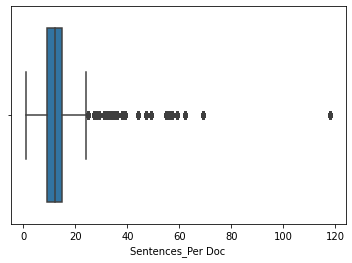

In [33]:
import seaborn as sns
sns.boxplot(labels_wt["Sentences_Per Doc"])

> * As it can be inferred from the boxplot above, there are some extreme outliers while the vast majority of the distribution is restricted in a range about 10-18.
> * So, let's explore some thresholds that will provide a more solid distribution of the number of sentences per abstract, but without losing much information.

In [34]:
len(labels_wt.doc_id.unique())

2686

In [35]:
print(f'Number of Abstracts with more than 20 sentences: {len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >20].unique())}')
print(f'Percentage of Abstracts with more than 20 sentences: {round((len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >20].unique()) / \
                                                                     len(labels_wt.doc_id.unique())) *100, 2)} %')

print("")

print(f'Number of Abstracts with more than 25 sentences: {len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >25].unique())}')
print(f'Percentage of Abstracts with more than 25 sentences: {round((len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >25].unique()) / \
                                                                     len(labels_wt.doc_id.unique())) *100, 2)} %')

print("")

print(f'Number of Abstracts with more than 30 sentences: {len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >30].unique())}')
print(f'Percentage of Abstracts with more than 30 sentences: {round((len(labels_wt.doc_id[labels_wt["Sentences_Per Doc"] >30].unique())/ \
                                                                  len(labels_wt.doc_id.unique())) *100, 2)} %')

Number of Abstracts with more than 20 sentences: 66
Percentage of Abstracts with more than 20 sentences: 2.46 %

Number of Abstracts with more than 25 sentences: 31
Percentage of Abstracts with more than 25 sentences: 1.15 %

Number of Abstracts with more than 30 sentences: 24
Percentage of Abstracts with more than 30 sentences: 0.89 %


> * Our Choise based on the boxplot and the findings above is to keep a **threshold of 25 sentences** per abstract.
> * This is because on the one hand we do not lose much information with dropping documents above that threshold **(1.08 %)**, but on the other hand we do not obtain much more information with a higher threshold of 30 (1.08% - 0.81% = **0.27%**).
> * So a threshold of 25 sentences seems reasonable based on our data.

Now, it's time to drop the documents above that threshold and see the distribution  of our data again.



In [36]:
#@title Remove the Documents above Threshold and see the value counts of each number of sentences

sentences_wt_final = sentences_wt[sentences_wt['Sentences_Per Doc'] <= 25] # & sentences_wt['Sentences_Per Doc'] > 3
(sentences_wt_final['Sentences_Per Doc'].value_counts()/ \
 sentences_wt_final['Sentences_Per Doc'].value_counts().index)

12    260.0
11    274.0
10    276.0
13    187.0
9     270.0
14    163.0
8     237.0
15    118.0
7     214.0
16     84.0
6     190.0
17     62.0
18     36.0
19     29.0
5     103.0
20     25.0
23     10.0
21      9.0
4      47.0
22      8.0
25      5.0
24      3.0
3      19.0
1      19.0
2       7.0
dtype: float64

In [37]:
sentences_wt_final[sentences_wt_final['Sentences_Per Doc'] > 25]

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID


The same for Labels

In [38]:
labels_wt_final = labels_wt[labels_wt['Sentences_Per Doc'] <= 25] # labels_wt['Sentences_Per Doc'] > 3
(labels_wt_final['Sentences_Per Doc'].value_counts()/ \
 labels_wt_final['Sentences_Per Doc'].value_counts().index)

12    260.0
11    274.0
10    276.0
13    187.0
9     270.0
14    163.0
8     237.0
15    118.0
7     214.0
16     84.0
6     190.0
17     62.0
18     36.0
19     29.0
5     103.0
20     25.0
23     10.0
21      9.0
4      47.0
22      8.0
25      5.0
24      3.0
3      19.0
1      19.0
2       7.0
dtype: float64

In [39]:
labels_wt_final[labels_wt_final['Sentences_Per Doc'] > 25]

,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


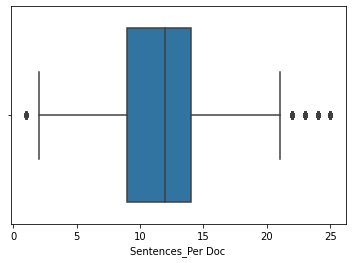

In [40]:
sns.boxplot(labels_wt_final['Sentences_Per Doc'])

## Split Dataset into Train/Test/Validation Sets

> * First of all, for data consistency reason, the split will be made into the doc_ids and after that the corresponding sentences and labels will be introduced in Train, Validation and Test sets.
> * So, we are going to split the documents as a whole and after that, labels and sentences will be introduced, using the doc_ids.
> * In our models the X will be the sentences dataset, while the Y will be the one with the corresponding labels.
>* The datasets that were produced after the data cleansing procedures will, firstly, be split into:

>> 1.   **Train-Validation Set** (85% of the Dataset)
>> 2.   **Test Set** (15% of the dataset)

> * We are going to use only the **"sentence"** column of the sentences dataset and only the **"label"** column of the labels dataset.  



In [41]:
#@title Take the unique Document IDss
sentences_doc_ids = pd.DataFrame(sentences_wt_final.doc_id.unique())
labels_doc_ids = pd.DataFrame(labels_wt_final.doc_id.unique())

In [42]:
from sklearn.model_selection import train_test_split
sentences_train_val_doc_id, sentences_test_doc_id, labels_train_val_doc_id, labels_test_doc_id = train_test_split(sentences_doc_ids, labels_doc_ids,
                                                                                                 test_size=0.15, random_state=42)

> * Further split of the **Train-Validation Set** will be made, dividing it into :
>>1.   **Train Set** (80% of the Train-Validation Set)
>>2.   **Validation Set** (20% of the Train-Validation Set)



In [43]:
sentences_train_doc_id, sentences_val_doc_id, labels_train_doc_id, labels_val_doc_id = train_test_split(sentences_train_val_doc_id, labels_train_val_doc_id,
                                                                                                        test_size=0.2, random_state=42)

In [44]:
print(f'Sentences Train-Validation Set Number of Documents: {sentences_train_val_doc_id.shape[0]}')
print(f'Labels Train-Validation Set Number of Documents: {labels_train_val_doc_id.shape[0]}')
print()

print(f'Sentences Train Set Number of Documents: {sentences_train_doc_id.shape[0]}')
print(f'Labels Train Set Number of Documents: {labels_train_doc_id.shape[0]}')
print()

print(f'Sentences Validation Set Number of Documents: {sentences_val_doc_id.shape[0]}')
print(f'Labels Validation Set Number of Documents: {labels_val_doc_id.shape[0]}')

print()
print(f'Sentences Test Set Number of Documents: {sentences_test_doc_id.shape[0]}')
print(f'Labels Test Set Number of Documents: {labels_test_doc_id.shape[0]}')

Sentences Train-Validation Set Number of Documents: 2256
Labels Train-Validation Set Number of Documents: 2256

Sentences Train Set Number of Documents: 1804
Labels Train Set Number of Documents: 1804

Sentences Validation Set Number of Documents: 452
Labels Validation Set Number of Documents: 452

Sentences Test Set Number of Documents: 399
Labels Test Set Number of Documents: 399


> * Now we are going to split the sentences and labels datasets into the corresponding Sets, based on the **doc_ids** that are in each set.
> * Only for the Training set, two versions of the final Set will be constructed. 
>> 1. The one will contain all the variables as it was constructed before and will be used for **Exploratory Data Analysis**.
>> 2. The other one will have only the **sentence** as described before for tha training of the model. 

>* Exporatory Data Analysis will not be performed for **Test** and **Validation** Sets as they should be the unknown sets for our model.

In [45]:
#@title Sentences Train EDA
sentences_train_EDA = sentences_wt_final.merge(sentences_train_doc_id, how='inner', left_on= 'doc_id', right_on= 0)
sentences_train_EDA = sentences_train_EDA.drop(0,axis='columns')
sentences_train_EDA.head()

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Importance Visual assessment of amyloid positr...,16,1,1
1,0,Several immunoassays have been developed to me...,16,2,2
2,0,The agreement between CSF Aβ42 measures from d...,16,3,3
3,0,Objective To determine the concordance between...,16,4,4
4,0,"Design, Setting, and Participants The study in...",16,5,5


In [46]:
#@title Labels Train EDA
labels_train_EDA = labels_wt_final.merge(labels_train_doc_id, how='inner', left_on= 'doc_id', right_on= 0)
labels_train_EDA = labels_train_EDA.drop(0,axis='columns')
labels_train_EDA

,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,16,1,1
1,0,NEITHER,16,2,2
2,0,NEITHER,16,3,3
3,0,NEITHER,16,4,4
4,0,NEITHER,16,5,5
...,...,...,...,...,...
19066,2685,EVIDENCE,14,31999,10
19067,2685,NEITHER,14,32000,11
19068,2685,CLAIM,14,32001,12
19069,2685,CLAIM,14,32002,13


In [47]:
# Sentences Train
sentences_train = pd.merge(sentences_wt_final[['doc_id', 'sentence']], sentences_train_doc_id,left_on='doc_id', right_on= 0, how='inner')
sentences_train = sentences_train.drop(['doc_id',0],axis='columns')
sentences_train

,sentence
0,Importance Visual assessment of amyloid positr...
1,Several immunoassays have been developed to me...
2,The agreement between CSF Aβ42 measures from d...
3,Objective To determine the concordance between...
4,"Design, Setting, and Participants The study in..."
...,...
19066,No statistically significant difference in con...
19067,Latanoprost 0.005% once daily reduced IOP more...
19068,Latanoprost had no statistically or clinically...
19069,There was no difference in hyperemia between t...


In [48]:
# Labels Train
labels_train = pd.merge(labels_wt_final[['doc_id', 'label']], labels_train_doc_id,left_on='doc_id', right_on= 0, how='inner')
labels_train = labels_train.drop(['doc_id',0],axis='columns')
labels_train

,label
0,NEITHER
1,NEITHER
2,NEITHER
3,NEITHER
4,NEITHER
...,...
19066,EVIDENCE
19067,NEITHER
19068,CLAIM
19069,CLAIM


In [49]:
# Sentences Test
sentences_test = pd.merge(sentences_wt_final[['doc_id', 'sentence']], sentences_test_doc_id,left_on='doc_id', right_on= 0, how='inner')
sentences_test = sentences_test.drop(['doc_id',0],axis='columns')
sentences_test

,sentence
0,"Abstract The first law of photochemistry, as d..."
1,"Draper, states that only the light absorbed by..."
2,"Consequently, the photochemical behavior of a ..."
3,A compound with a chromophore that only absorb...
4,If one can reversibly modify the photophysical...
...,...
4107,The mean IOP spike in the first month was lowe...
4108,To evaluate the long-term intraocular pressure...
4109,When success was defined as an IOP reduction o...
4110,The success probability of trabeculectomy and ...


In [50]:
# Labels Test
labels_test = pd.merge(labels_wt_final[['doc_id', 'label']], labels_test_doc_id,left_on='doc_id', right_on= 0, how='inner')
labels_test = labels_test.drop(['doc_id',0],axis='columns')
labels_test

,label
0,NEITHER
1,NEITHER
2,NEITHER
3,NEITHER
4,NEITHER
...,...
4107,EVIDENCE
4108,NEITHER
4109,EVIDENCE
4110,EVIDENCE


In [51]:
# Sentences Validation
sentences_val = pd.merge(sentences_wt_final[['doc_id', 'sentence']], sentences_val_doc_id,left_on='doc_id', right_on= 0, how='inner')
sentences_val = sentences_val.drop(['doc_id',0],axis='columns')
sentences_val

,sentence
0,The physical mechanisms governing slow earthqu...
1,To investigate the mechanism(s) of slow earthq...
2,We reproduced the full spectrum of slip behavi...
3,Our experiments show an evolution from stable ...
4,To evaluate the microphysical processes of fau...
...,...
4835,Visual acuities were better or remained the sa...
4836,Complications during the 5-year follow-up were...
4837,The longer term results show that the 350-mm2 ...
4838,Interval comparisons indicate a higher rate of...


In [52]:
# Labels Val
labels_val = pd.merge(labels_wt_final[['doc_id', 'label']], labels_val_doc_id,left_on='doc_id', right_on= 0, how='inner')
labels_val = labels_val.drop(['doc_id',0],axis='columns')
labels_val

,label
0,NEITHER
1,NEITHER
2,NEITHER
3,EVIDENCE
4,EVIDENCE
...,...
4835,EVIDENCE
4836,NEITHER
4837,CLAIM
4838,CLAIM


In [53]:
print(f'Sentences Train Shape: {sentences_train.shape}')
print(f'Labels Train Shape: {labels_train.shape}')
print()

print(f'Sentences Test Shape: {sentences_test.shape}')
print(f'Labels Test Shape: {labels_test.shape}')
print()

print(f'Sentences Validation Shape: {sentences_val.shape}')
print(f'Labels Validation Shape: {labels_val.shape}')
print()

print(f'Sum of Sentences of all Sets equal to initial sum before split?: {sentences_train.shape[0] + sentences_test.shape[0] + sentences_val.shape[0] == \
                                                                          sentences_wt_final.shape[0]}')
print(f'Sum of Labels of all Sets equal to initial sum before split?: {labels_train.shape[0] + labels_test.shape[0] + labels_val.shape[0] == \
                                                                          labels_wt_final.shape[0]}')



Sentences Train Shape: (19071, 1)
Labels Train Shape: (19071, 1)

Sentences Test Shape: (4112, 1)
Labels Test Shape: (4112, 1)

Sentences Validation Shape: (4840, 1)
Labels Validation Shape: (4840, 1)

Sum of Sentences of all Sets equal to initial sum before split?: True
Sum of Labels of all Sets equal to initial sum before split?: True


## Exploratory Data Analysis on the Training Set

We are going to merge Labels and Sentences in a common Dataset that will be used for EDA.

In [54]:
sentences_train_EDA

,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,Importance Visual assessment of amyloid positr...,16,1,1
1,0,Several immunoassays have been developed to me...,16,2,2
2,0,The agreement between CSF Aβ42 measures from d...,16,3,3
3,0,Objective To determine the concordance between...,16,4,4
4,0,"Design, Setting, and Participants The study in...",16,5,5
...,...,...,...,...,...
19066,2685,No statistically significant difference in con...,14,31999,10
19067,2685,Latanoprost 0.005% once daily reduced IOP more...,14,32000,11
19068,2685,Latanoprost had no statistically or clinically...,14,32001,12
19069,2685,There was no difference in hyperemia between t...,14,32002,13


In [55]:
labels_train_EDA

,doc_id,label,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,0,NEITHER,16,1,1
1,0,NEITHER,16,2,2
2,0,NEITHER,16,3,3
3,0,NEITHER,16,4,4
4,0,NEITHER,16,5,5
...,...,...,...,...,...
19066,2685,EVIDENCE,14,31999,10
19067,2685,NEITHER,14,32000,11
19068,2685,CLAIM,14,32001,12
19069,2685,CLAIM,14,32002,13


In [56]:
train_EDA = pd.merge(labels_train_EDA['label'], sentences_train_EDA, left_index=True, right_index=True)
train_EDA

,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID
0,NEITHER,0,Importance Visual assessment of amyloid positr...,16,1,1
1,NEITHER,0,Several immunoassays have been developed to me...,16,2,2
2,NEITHER,0,The agreement between CSF Aβ42 measures from d...,16,3,3
3,NEITHER,0,Objective To determine the concordance between...,16,4,4
4,NEITHER,0,"Design, Setting, and Participants The study in...",16,5,5
...,...,...,...,...,...,...
19066,EVIDENCE,2685,No statistically significant difference in con...,14,31999,10
19067,NEITHER,2685,Latanoprost 0.005% once daily reduced IOP more...,14,32000,11
19068,CLAIM,2685,Latanoprost had no statistically or clinically...,14,32001,12
19069,CLAIM,2685,There was no difference in hyperemia between t...,14,32002,13


**Let's Explore the Labels'  Statistics**


In [57]:
counts = train_EDA.label.value_counts()
counts

NEITHER     12626
EVIDENCE     4158
CLAIM        2287
Name: label, dtype: int64

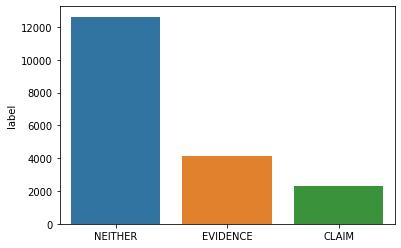

In [58]:
import seaborn as sns
sns.barplot(x = train_EDA.label.value_counts().index,
            y = train_EDA.label.value_counts())

In [59]:
#Percentages of labels
percentages = round((train_EDA.label.value_counts())/ (train_EDA.label.count()) * 100, 2)
percentages

NEITHER     66.21
EVIDENCE    21.80
CLAIM       11.99
Name: label, dtype: float64

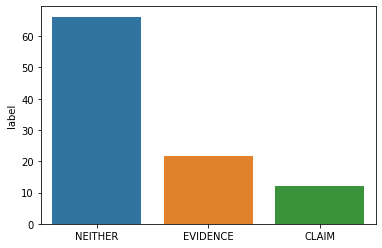

In [60]:
sns.barplot(x = percentages.index, y = percentages )

> We are going to use 3 new variables counting the number of label in each abstract. 

In [61]:
train_EDA['claims'] = 0
train_EDA['evidences'] = 0
train_EDA['neithers'] = 0
len_EDA = len(train_EDA)

for i in  range(0,(len_EDA)):
  if (train_EDA['label'][i] == 'CLAIM'):
    train_EDA['claims'][i] = train_EDA['claims'][i] + 1 
  elif (train_EDA['label'][i] == 'EVIDENCE'):
    train_EDA['evidences'][i] = train_EDA['evidences'][i] + 1
  else:
    train_EDA['neithers'][i] = train_EDA['neithers'][i] + 1 

train_EDA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers
0,NEITHER,0,Importance Visual assessment of amyloid positr...,16,1,1,0,0,1
1,NEITHER,0,Several immunoassays have been developed to me...,16,2,2,0,0,1
2,NEITHER,0,The agreement between CSF Aβ42 measures from d...,16,3,3,0,0,1
3,NEITHER,0,Objective To determine the concordance between...,16,4,4,0,0,1
4,NEITHER,0,"Design, Setting, and Participants The study in...",16,5,5,0,0,1
...,...,...,...,...,...,...,...,...,...
19066,EVIDENCE,2685,No statistically significant difference in con...,14,31999,10,0,1,0
19067,NEITHER,2685,Latanoprost 0.005% once daily reduced IOP more...,14,32000,11,0,0,1
19068,CLAIM,2685,Latanoprost had no statistically or clinically...,14,32001,12,1,0,0
19069,CLAIM,2685,There was no difference in hyperemia between t...,14,32002,13,1,0,0


In [62]:
sum_claims = 0
sum_evidences = 0
sum_neithers = 0
sent = 0

i = 0

while (i < len_EDA):

  sent = train_EDA['Sentences_Per Doc'][i] - 1 # because indexing starts from 0

  sum_claims = 0 
  sum_claims = sum(train_EDA.loc[i : (i + sent), 'claims'])
  train_EDA.loc[i : (i + sent), 'claims'] = sum_claims
  
  sum_evidences = 0 
  sum_evidences = sum(train_EDA.loc[i : (i + sent), 'evidences'])
  train_EDA.loc[i: (i + sent), 'evidences'] = sum_evidences
  
  sum_neithers = 0
  sum_neithers = sum(train_EDA.loc[i : (i + sent), 'neithers'])
  train_EDA.loc[i : (i + sent), 'neithers'] = sum_neithers
  
  sent = 0
  i = i + (train_EDA['Sentences_Per Doc'][i]) 

train_EDA

,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers
0,NEITHER,0,Importance Visual assessment of amyloid positr...,16,1,1,2,7,7
1,NEITHER,0,Several immunoassays have been developed to me...,16,2,2,2,7,7
2,NEITHER,0,The agreement between CSF Aβ42 measures from d...,16,3,3,2,7,7
3,NEITHER,0,Objective To determine the concordance between...,16,4,4,2,7,7
4,NEITHER,0,"Design, Setting, and Participants The study in...",16,5,5,2,7,7
...,...,...,...,...,...,...,...,...,...
19066,EVIDENCE,2685,No statistically significant difference in con...,14,31999,10,3,4,7
19067,NEITHER,2685,Latanoprost 0.005% once daily reduced IOP more...,14,32000,11,3,4,7
19068,CLAIM,2685,Latanoprost had no statistically or clinically...,14,32001,12,3,4,7
19069,CLAIM,2685,There was no difference in hyperemia between t...,14,32002,13,3,4,7


In [63]:
print(f'Minimum Number of Claims Per Abstract: {train_EDA.claims.min()}')
print(f'Maximum Number of Claims Per Abstract: {train_EDA.claims.max()}')
print(f'Average Number of Claims Per Abstract: {train_EDA.claims.mean()}')
print(f'Median Number of Claims Per Abstract: {train_EDA.claims.median()}')
print()

Minimum Number of Claims Per Abstract: 0
Maximum Number of Claims Per Abstract: 5
Average Number of Claims Per Abstract: 1.3759110691626029
Median Number of Claims Per Abstract: 1.0



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


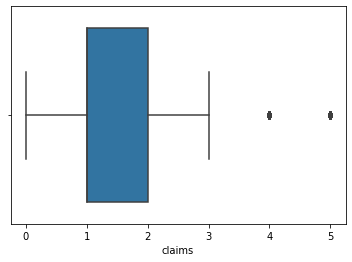

In [64]:
sns.boxplot(train_EDA.claims)

In [65]:
print(f'Minimum Number of Evidences Per Abstract: {train_EDA.evidences.min()}')
print(f'Maximum Number of Evidences Per Abstract: {train_EDA.evidences.max()}')
print(f'Average Number of Evidences Per Abstract: {train_EDA.evidences.mean()}')
print(f'Median Number of Evidences Per Abstract: {train_EDA.evidences.median()}')
print()

Minimum Number of Evidences Per Abstract: 0
Maximum Number of Evidences Per Abstract: 10
Average Number of Evidences Per Abstract: 2.595406638351424
Median Number of Evidences Per Abstract: 2.0



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


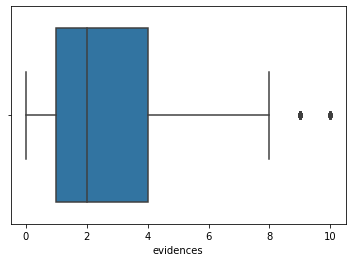

In [66]:
sns.boxplot(train_EDA.evidences)

In [67]:
print(f'Minimum Number of Nones Per Abstract: {train_EDA.neithers.min()}')
print(f'Maximum Number of Nones Per Abstract: {train_EDA.neithers.max()}')
print(f'Average Number of Nones Per Abstract: {train_EDA.neithers.mean()}')
print(f'Median Number of Nones Per Abstract: {train_EDA.neithers.median()}')
print()

Minimum Number of Nones Per Abstract: 0
Maximum Number of Nones Per Abstract: 24
Average Number of Nones Per Abstract: 8.053903833044938
Median Number of Nones Per Abstract: 7.0



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


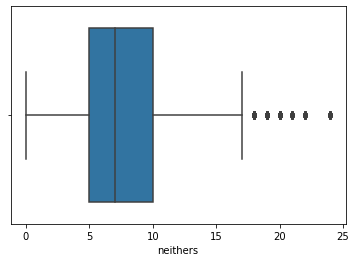

In [68]:
sns.boxplot(train_EDA.neithers)

A first logical insight from the statistics for the baseline intuitive model can be that we want all the abstracts to have:\
> 1. One up to 2 Claims
> 2. One up to 4 Evidences
> 3. Leave the rest sentences as neither. 


Lets's see what is going on in the extreme instances of 1,and 2 sentences per abstract.

In [69]:
#@title One Sentence
train_EDA.label[(train_EDA['Sentences_Per Doc'] == 1)].value_counts()

NEITHER     7
CLAIM       5
EVIDENCE    2
Name: label, dtype: int64

In [70]:
#@title Two Sentences
train_EDA.label[(train_EDA['Sentences_Per Doc'] == 2)].value_counts()

CLAIM       4
NEITHER     3
EVIDENCE    1
Name: label, dtype: int64

* An Insight from above that can be used for the baseline intuitive classification is that in abstracts with 1 and 2 sentences, evidence is very sparse to appear.
* So the lexicons can help further to decide between CLAIM and NEITHER.

* **Below, we can also see the distribution of each label in each In-Document Sentence ID**

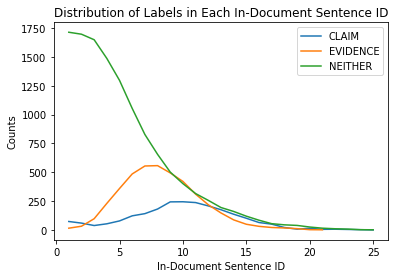

In [71]:
import matplotlib.pylab as plt

plt.plot(train_EDA[(train_EDA['label'] == 'CLAIM') ].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[(train_EDA['label'] == 'CLAIM') ].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'CLAIM')

plt.plot(train_EDA[train_EDA['label'] == 'EVIDENCE'].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[train_EDA['label'] == 'EVIDENCE'].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'EVIDENCE')

plt.plot(train_EDA[train_EDA['label'] == 'NEITHER'].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[train_EDA['label'] == 'NEITHER'].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'NEITHER')

plt.xlabel('In-Document Sentence ID')
plt.ylabel('Counts')
plt.title("Distribution of Labels in Each In-Document Sentence ID")

plt.legend()

plt.show()

> * A new Variable will be introduced, which will be a flag taking values:
>>  a. **1** if a sentence is the last one of the abstract.\
>>  b. **0** if it is not.




In [72]:
train_EDA['Is_Last'] = 0
len_EDA = len(train_EDA) 
for i in  range(0, len_EDA):
  if train_EDA['In_Doc_Sentence_ID'][i] == (train_EDA['Sentences_Per Doc'][i]):
    train_EDA['Is_Last'][i] = 1   
train_EDA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers,Is_Last
0,NEITHER,0,Importance Visual assessment of amyloid positr...,16,1,1,2,7,7,0
1,NEITHER,0,Several immunoassays have been developed to me...,16,2,2,2,7,7,0
2,NEITHER,0,The agreement between CSF Aβ42 measures from d...,16,3,3,2,7,7,0
3,NEITHER,0,Objective To determine the concordance between...,16,4,4,2,7,7,0
4,NEITHER,0,"Design, Setting, and Participants The study in...",16,5,5,2,7,7,0
...,...,...,...,...,...,...,...,...,...,...
19066,EVIDENCE,2685,No statistically significant difference in con...,14,31999,10,3,4,7,0
19067,NEITHER,2685,Latanoprost 0.005% once daily reduced IOP more...,14,32000,11,3,4,7,0
19068,CLAIM,2685,Latanoprost had no statistically or clinically...,14,32001,12,3,4,7,0
19069,CLAIM,2685,There was no difference in hyperemia between t...,14,32002,13,3,4,7,0


**Distribution of Labels in the Last Sentence**

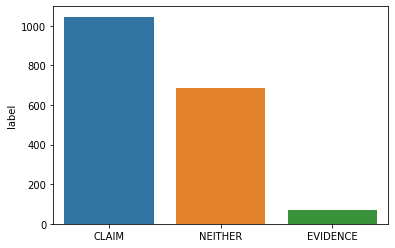

In [73]:
sns.barplot(x = train_EDA.label[train_EDA['Is_Last'] == 1].value_counts().index,
            y = train_EDA.label[train_EDA['Is_Last'] == 1].value_counts())

In [74]:
train_EDA.label[train_EDA['Is_Last'] == 1].value_counts()

CLAIM       1046
NEITHER      688
EVIDENCE      70
Name: label, dtype: int64

In [75]:
print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'CLAIM')].count() /\
train_EDA.label[(train_EDA['Is_Last'] == 1)].count()) * 100, 2)} % of the Last Sentences in each Document are CLAIMS")

print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'CLAIM')].count() /\
train_EDA.label[(train_EDA['label'] == 'CLAIM')].count()) * 100, 2)} % of the CLAIMS are in the Last Sentence")
print()

print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'EVIDENCE')].count() /\
train_EDA.label[(train_EDA['Is_Last'] == 1)].count()) * 100, 2)} % of the Last Sentences in each Document are EVIDENCES")

print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'EVIDENCE')].count() /\
train_EDA.label[(train_EDA['label'] == 'EVIDENCE')].count()) * 100, 2)} % of the EVIDENCES are in the Last Sentence")
print()

print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'NEITHER')].count() /\
train_EDA.label[(train_EDA['Is_Last'] == 1)].count()) * 100, 2)} % of the Last Sentences in each Document are NEITHERS")

print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'NEITHER')].count() /\
train_EDA.label[(train_EDA['label'] == 'NEITHER')].count()) * 100, 2)} % of the NEITHERS are in the Last Sentence")




The 57.98 % of the Last Sentences in each Document are CLAIMS
The 45.74 % of the CLAIMS are in the Last Sentence

The 3.88 % of the Last Sentences in each Document are EVIDENCES
The 1.68 % of the EVIDENCES are in the Last Sentence

The 38.14 % of the Last Sentences in each Document are NEITHERS
The 5.45 % of the NEITHERS are in the Last Sentence


* **So there is a pretty high probability for the last sentence of each document to be a CLAIM.**


But let's explore it further

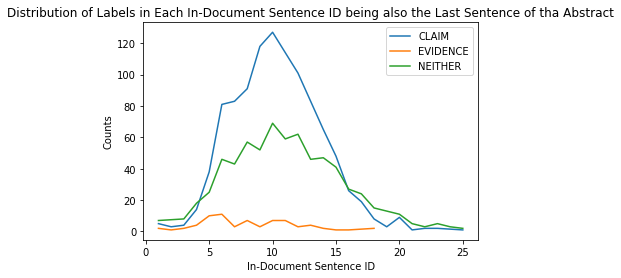

In [76]:
plt.plot(train_EDA[(train_EDA['label'] == 'CLAIM') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[(train_EDA['label'] == 'CLAIM') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'CLAIM')

plt.plot(train_EDA[(train_EDA['label'] == 'EVIDENCE') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[(train_EDA['label'] == 'EVIDENCE') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'EVIDENCE')

plt.plot(train_EDA[(train_EDA['label'] == 'NEITHER') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index().reset_index()['index'],
         train_EDA[(train_EDA['label'] == 'NEITHER') & (train_EDA['Is_Last'] == 1)].In_Doc_Sentence_ID.value_counts().sort_index(), label = 'NEITHER')

plt.xlabel('In-Document Sentence ID')
plt.ylabel('Counts')
plt.title('Distribution of Labels in Each In-Document Sentence ID being also the Last Sentence of tha Abstract')

plt.legend()

plt.show()

In [77]:
print(f"The {round((train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'CLAIM') &\
           ((train_EDA['Sentences_Per Doc'] >= 5) & (train_EDA['Sentences_Per Doc'] <= 16))].count() /\
train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'CLAIM')].count()) * 100, 2) } % of Claims in the Last Sentence are in a range of 5th t 15th sentence of an abstract.")

The 93.21 % of Claims in the Last Sentence are in a range of 5th t 15th sentence of an abstract.


In [78]:
train_EDA.label[ (train_EDA['Is_Last'] == 1) & (train_EDA['label'] == 'NEITHER') &\
           ((train_EDA['Sentences_Per Doc'] > 16 ))].count()

81

> * After all, a rule for the intuitive baseline model can be that:\
 **a) If a sentence is the last one of an Abstract and it is in the range [5,15] as for the In-Document Sentence ID, it is labeled as "CLAIM"**.\
 **b) If a sentence is the last one of an Abstract and it is in the range [1,5) as for the In-Document Sentence ID, it is labeled as "EVIDENCE"**.\
 **c)If a sentence is the last one of an Abstract and it is in the range (15,25] as for the In-Document Sentence ID, it is labeled as "NEITHER"**
* However, this rule will be further developed, by implementing some key-words which will be described in a while.

A new metric like the previous one for the last sentence will be constructed for the the pre-last one and for the one about 2 sentences before the last.

In [79]:
train_EDA['Is_Pre_Last'] = 0
for i in  range(0,len_EDA - 2):  #-2 because indexing starts from 0 and the last sentence is also last sentence in the abstract it belongs to.
  if ((train_EDA['Sentences_Per Doc'][i] > 1) & (train_EDA['Is_Last'][i + 1] == 1)): # exclude abstracts with one sentence
    train_EDA['Is_Pre_Last'][i] = 1 
train_EDA[train_EDA['Is_Pre_Last'] == 1]   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers,Is_Last,Is_Pre_Last
14,CLAIM,0,Conclusions and Relevance Concentrations of CS...,16,15,15,2,7,7,0,1
29,CLAIM,1,Further investigations will be required to stu...,15,31,14,3,5,7,0,1
34,EVIDENCE,2,"Following triggering, the gouge material remai...",5,37,4,1,2,2,0,1
44,EVIDENCE,3,"At these time scales, the BLOCK scheme affects...",10,48,9,1,5,4,0,1
50,EVIDENCE,4,Here we show that the effects of switching off...,6,55,5,1,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19014,CLAIM,2678,Latanoprost once daily was significantly more ...,15,31921,14,2,5,8,0,1
19023,EVIDENCE,2680,"At 15 months, the mean number of medications w...",9,31947,8,1,2,6,0,1
19034,CLAIM,2682,"In patients with PACG, the long-term IOP-lower...",11,31964,10,2,2,7,0,1
19044,CLAIM,2683,"The safety profile was similar in both groups,...",10,31975,9,2,3,5,0,1


In [80]:
train_EDA['Is_2_Before_Last'] = 0
for i in  range(0,len_EDA - 3):  #-3 because indexing starts from 0 and the last sentence is also last sentence in the abstract it belongs to and the pre-last also.
  if ((train_EDA['Sentences_Per Doc'][i] > 2) & (train_EDA['Is_Pre_Last'][i + 1] == 1)):  # exclude abstracts with 2 sentences
    train_EDA['Is_2_Before_Last'][i] = 1 
train_EDA[train_EDA['Is_2_Before_Last'] == 1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers,Is_Last,Is_Pre_Last,Is_2_Before_Last
13,EVIDENCE,0,A combination of the Aβ42:Aβ40 ratio and T-tau...,16,14,14,2,7,7,0,0,1
28,CLAIM,1,The increases in both neurofilament light and ...,15,30,13,3,5,7,0,0,1
33,EVIDENCE,2,When the system is sheared under steady state ...,5,36,3,1,2,2,0,0,1
43,EVIDENCE,3,"In 10 day forecasts, stronger changes are foun...",10,47,8,1,5,4,0,0,1
49,NEITHER,4,Yet how the representation of orography affect...,6,54,4,1,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19013,EVIDENCE,2678,Eye redness and ocular irritation were the mos...,15,31920,13,2,5,8,0,0,1
19022,EVIDENCE,2680,The mean IOP was 14.8 +/- 1.2 mm Hg in the com...,9,31946,7,1,2,6,0,0,1
19033,EVIDENCE,2682,No additional IOP-lowering surgical procedures...,11,31963,9,2,2,7,0,0,1
19043,EVIDENCE,2683,"In the currently-prescribed drug group, the re...",10,31974,8,2,3,5,0,0,1


In [81]:
train_EDA.label[train_EDA['Is_Pre_Last'] == 1 ].value_counts()

CLAIM       624
NEITHER     596
EVIDENCE    579
Name: label, dtype: int64

Continue....

### **Build Lexicons of the most common words for each label**

> * Firstly, we are going to define a counter_vectorizer which will transform the sentences to binary vectors.
> * The stopwords of the English Language will be excluded.
> * We set lowercase parameter to True so a transformation of the sentences to lowercase is needed.
> * The length of the vectors will be 20,000 which means 20,000 different words. That size is far from enough for the size of our data.
> * This procedure will be followed for all the 3 labels seperately, in order to build 3 characteristic lexicons. 


In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


counter_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=stopwords.words('english'),
    ngram_range=(1, 1), # unigrams
    max_features= 40000,
    binary=False # binary output or full counts. 
)
counter_vectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=40000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [83]:
#Transformation to lowercase for Claims
just_sentence_claims = train_EDA.sentence[train_EDA['label'] == 'CLAIM'].str.lower().str.replace('.', ' ')
just_sentence_claims

14       conclusions and relevance concentrations of cs...
15       these findings suggest the benefit of implemen...
28       the increases in both neurofilament light and ...
29       further investigations will be required to stu...
30       these preliminary findings demand that we ques...
                               ...                        
19045    because the efficacy of both drugs was equival...
19056    our study suggests that intraoperative topical...
19068    latanoprost had no statistically or clinically...
19069    there was no difference in hyperemia between t...
19070    both concentrations of latanoprost reduced iop...
Name: sentence, Length: 2287, dtype: object

In [84]:
#Transformation to lowercase for Evidences
just_sentence_evidences = train_EDA.sentence[train_EDA['label'] == 'EVIDENCE'].str.lower().str.replace('.', ' ')
just_sentence_evidences

7        main outcomes and measures the concordance of ...
8        results of 262 participants (mean [sd] age, 70...
9        the mass spectrometry–derived aβ42 values show...
10       the signal in the classic aβ42-innotest assay ...
11       however, the classic aβ42-innotest assay showe...
                               ...                        
19055    the most common complications in each group we...
19063    latanoprost 0 005% once daily reduced iop (+/-...
19064    there was a statistically significant increase...
19065    there was no statistically significant differe...
19066    no statistically significant difference in con...
Name: sentence, Length: 4158, dtype: object

We will also define a function in order to keep numbers out of our lexicon, using regular expressions.

In [85]:
#Transformation to lowercase for Neithers
just_sentence_neithers = train_EDA.sentence[train_EDA['label'] == 'NEITHER'].str.lower().str.replace('.', ' ')
just_sentence_neithers

0        importance visual assessment of amyloid positr...
1        several immunoassays have been developed to me...
2        the agreement between csf aβ42 measures from d...
3        objective to determine the concordance between...
4        design, setting, and participants the study in...
                               ...                        
19059    moreover, the safety aspects of the two regime...
19060    a double-masked, randomized study was performe...
19061    twenty patients were treated with latanoprost ...
19062    ten patients received timolol 0 5% twice daily...
19067    latanoprost 0 005% once daily reduced iop more...
Name: sentence, Length: 12626, dtype: object

In [86]:
import re

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

In [87]:
for i in just_sentence_claims.index:
  just_sentence_claims[i] = remove_numbers(just_sentence_claims[i]) 

for i in just_sentence_evidences.index:
  just_sentence_evidences[i] = remove_numbers(just_sentence_evidences[i])
  
for i in just_sentence_neithers.index:
  just_sentence_neithers[i] = remove_numbers(just_sentence_neithers[i]) 

> * Before fitting the Counter Vectorizer, let's have a Visualization of each words that the sentences of each label are consisted of.
> * A WordCloud plot would be ideal to have the "big image"

In [88]:
#Join all the words of the sentences that were transformed to lowercase
corpora_claims = " ".join(just_sentence_claims)
corpora_evidences = " ".join(just_sentence_evidences)
corpora_neithers = " ".join(just_sentence_neithers)

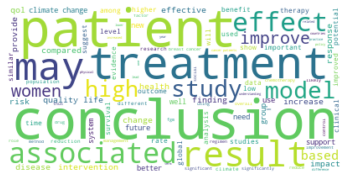

In [89]:
#Claims
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(corpora_claims)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

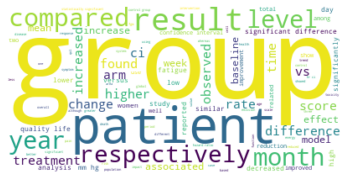

In [90]:
#Evidences
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(corpora_evidences)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

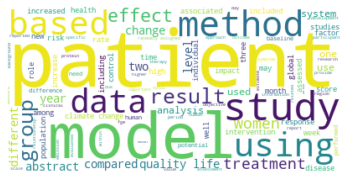

In [91]:
#Neithers
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(corpora_neithers)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [92]:
# Fit Count Vectorizer for Claims
claims_enc = counter_vectorizer.fit_transform(just_sentence_claims)
claims_enc[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [93]:
words_claims = pd.DataFrame.from_dict(counter_vectorizer.vocabulary_, orient = 'index')

In [94]:
# Fit Count Vectorizer for Evidences
evidences_enc = counter_vectorizer.fit_transform(just_sentence_evidences)
evidences_enc[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [95]:
words_evidences = pd.DataFrame.from_dict(counter_vectorizer.vocabulary_, orient = 'index')

In [96]:
# Fit Count Vectorizer for Evidences
neithers_enc = counter_vectorizer.fit_transform(just_sentence_neithers)
neithers_enc[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [97]:
words_neithers = pd.DataFrame.from_dict(counter_vectorizer.vocabulary_, orient = 'index')

> Below we can see the word that corresponds to each position of the vectors.

In [98]:
counter_vectorizer.vocabulary_['conclusion']

2858

> Now it's time to create the lexicons for the top words of each label.

In [99]:
words_claims.head(2)

,0
conclusions,1280
relevance,5719


In [100]:
#claims

words_claims['words_claims'] = words_claims.index
words_claims['index'] = words_claims[0]
words_claims = words_claims[['words_claims', 'index']]
words_claims = words_claims.sort_values(by='index').reset_index(drop = True)
words_claims


,words_claims,index
0,aavs,0
1,ab,1
2,abandonment,2
3,abatacept,3
4,abc,4
...,...,...
7451,zone,7451
7452,zoonotic,7452
7453,κb,7453
7454,μc,7454


In [101]:
#evidences

words_evidences['words_evidences'] = words_evidences.index
words_evidences['index'] = words_evidences[0]
words_evidences = words_evidences[['words_evidences', 'index']]
words_evidences = words_evidences.sort_values(by='index').reset_index(drop = True)
words_evidences

,words_evidences,index
0,__,0
1,aa,1
2,aaa,2
3,aad,3
4,aapc,4
...,...,...
9571,μa,9571
9572,μg,9572
9573,μm,9573
9574,μmol,9574


In [102]:
#neithers

words_neithers['words_neithers'] = words_neithers.index
words_neithers['index'] = words_neithers[0]
words_neithers = words_neithers[['words_neithers', 'index']]
words_neithers = words_neithers.sort_values(by='index').reset_index(drop = True)
words_neithers

,words_neithers,index
0,__,0
1,a_,1
2,aa,2
3,aaabbb,3
4,aact,4
...,...,...
16546,μj,16546
16547,μl,16547
16548,μm,16548
16549,μs,16549


In [103]:
# Create a Dataframe for the counts of each label's words

counts_claims = pd.DataFrame(claims_enc.sum(axis=0)).transpose()
counts_claims['index'] = counts_claims.index
counts_claims

counts_evidences = pd.DataFrame(evidences_enc.sum(axis=0)).transpose()
counts_evidences['index'] = counts_evidences.index
counts_evidences

counts_neithers = pd.DataFrame(neithers_enc.sum(axis=0)).transpose()
counts_neithers['index'] = counts_neithers.index
counts_neithers


,0,index
0,1,0
1,1,1
2,2,2
3,1,3
4,1,4
...,...,...
16546,2,16546
16547,2,16547
16548,12,16548
16549,1,16549


In [104]:
words_claims.columns

Index(['words_claims', 'index'], dtype='object')

In [105]:
#Claims Lexicon

claims_lexicon = words_claims.merge(counts_claims, how = 'inner', left_on = 'index', right_on='index')
claims_lexicon['counts'] = claims_lexicon[[0]]
claims_lexicon = claims_lexicon[['words_claims', 'index', 'counts']]
claims_lexicon = claims_lexicon.sort_values(by= 'counts' , ascending=False)
claims_lexicon

,words_claims,index,counts
4891,patients,4891,350
6960,treatment,6960,200
5857,results,5857,184
864,cancer,864,177
3001,health,3001,173
...,...,...,...
3469,insular,3469,1
3468,insufficiently,3468,1
3465,instrumental,3465,1
3462,institutionalized,3462,1


In [106]:
#Evidences Lexicon

evidences_lexicon = words_evidences.merge(counts_evidences, how = 'inner', left_on = 'index', right_on='index')
evidences_lexicon['counts'] = evidences_lexicon[[0]]
evidences_lexicon = evidences_lexicon[['words_evidences', 'index', 'counts']]
evidences_lexicon = evidences_lexicon.sort_values(by= 'counts' , ascending=False)
evidences_lexicon

,words_evidences,index,counts
3746,group,3746,743
6284,patients,6284,659
1369,ci,1369,512
7935,significant,7935,412
5518,months,5518,408
...,...,...,...
4528,intermediates,4528,1
4522,interglacial,4522,1
4520,interfering,4520,1
4518,interfered,4518,1


In [107]:
#Neithers Lexicon

neithers_lexicon = words_neithers.merge(counts_neithers, how = 'inner', left_on = 'index', right_on='index')
neithers_lexicon['counts'] = neithers_lexicon[[0]]
neithers_lexicon = neithers_lexicon[['words_neithers', 'index', 'counts']]
neithers_lexicon = neithers_lexicon.sort_values(by= 'counts' , ascending=False)
neithers_lexicon

,words_neithers,index,counts
10911,patients,10911,1728
14404,study,14404,1114
6603,health,6603,866
3522,data,3522,674
2490,climate,2490,665
...,...,...,...
8193,kynurenine,8193,1
8190,kwe,8190,1
8185,kupperman,8185,1
8184,kupffer,8184,1


In [108]:
top_words_claims = claims_lexicon[0:100]
top_words_evidences = evidences_lexicon[0:100]
top_words_neithers = neithers_lexicon[0:100]

New Metric How many top words in each sentence

In [109]:
train_EDA['claims_lexicon_counts'] = 0
train_EDA['evidences_lexicon_counts'] = 0
train_EDA['neithers_lexicon_counts'] = 0

In [110]:
import  tqdm

for i in tqdm.tqdm(range(0,train_EDA.doc_id.count())):
  for w in top_words_claims.words_claims:
      if (train_EDA.sentence[i].find(w) != -1):
        train_EDA.claims_lexicon_counts[i] = train_EDA.claims_lexicon_counts[i] + 1

  for w in top_words_evidences.words_evidences:
      if (train_EDA.sentence[i].find(w) != -1):
        train_EDA.evidences_lexicon_counts[i] = train_EDA.evidences_lexicon_counts[i] + 1

  for w in top_words_neithers.words_neithers:
      if (train_EDA.sentence[i].find(w) != -1):
        train_EDA.neithers_lexicon_counts[i] = train_EDA.neithers_lexicon_counts[i] + 1  

train_EDA.head(10)    

  0%|          | 0/19071 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|███████

,label,doc_id,sentence,Sentences_Per Doc,Sentence_Id,In_Doc_Sentence_ID,claims,evidences,neithers,Is_Last,Is_Pre_Last,Is_2_Before_Last,claims_lexicon_counts,evidences_lexicon_counts,neithers_lexicon_counts
0,NEITHER,0,Importance Visual assessment of amyloid positr...,16,1,1,2,7,7,0,0,0,2,2,3
1,NEITHER,0,Several immunoassays have been developed to me...,16,2,2,2,7,7,0,0,0,0,1,0
2,NEITHER,0,The agreement between CSF Aβ42 measures from d...,16,3,3,2,7,7,0,0,0,4,3,5
3,NEITHER,0,Objective To determine the concordance between...,16,4,4,2,7,7,0,0,0,5,5,5
4,NEITHER,0,"Design, Setting, and Participants The study in...",16,5,5,2,7,7,0,0,0,3,5,4
5,NEITHER,0,Levels of CSF Aβ42 were analyzed using the cla...,16,6,6,2,7,7,0,0,0,2,0,2
6,NEITHER,0,Concentrations of CSF Aβ were assessed using a...,16,7,7,2,7,7,0,0,0,2,1,3
7,EVIDENCE,0,Main Outcomes and Measures The concordance of ...,16,8,8,2,7,7,0,0,0,1,3,2
8,EVIDENCE,0,"Results Of 262 participants (mean [SD] age, 70...",16,9,9,2,7,7,0,0,0,1,6,5
9,EVIDENCE,0,The mass spectrometry–derived Aβ42 values show...,16,10,10,2,7,7,0,0,0,4,5,2


In [111]:
train_EDA[['label', 'claims_lexicon_counts', 'evidences_lexicon_counts', 'neithers_lexicon_counts']].head(10)

,label,claims_lexicon_counts,evidences_lexicon_counts,neithers_lexicon_counts
0,NEITHER,2,2,3
1,NEITHER,0,1,0
2,NEITHER,4,3,5
3,NEITHER,5,5,5
4,NEITHER,3,5,4
5,NEITHER,2,0,2
6,NEITHER,2,1,3
7,EVIDENCE,1,3,2
8,EVIDENCE,1,6,5
9,EVIDENCE,4,5,2


more in lexicons

# Classification based on the Baseline Intuitive model

forloop with conditions
...

In [112]:
import copy
train_EDA_classif = copy.copy(train_EDA)

In [113]:
train_EDA_classif['classif_output'] = 'NEITHER'
len_EDA_classif = len(train_EDA_classif)

for i in tqdm.tqdm(range(0,(len_EDA_classif))):
  if ((train_EDA_classif['Is_Last'][i] == 1) & ((train_EDA_classif['Sentences_Per Doc'][i] >= 5) & (train_EDA_classif['Sentences_Per Doc'][i] <= 16))):
    
    train_EDA_classif['classif_output'][i]= 'CLAIM'

for i in tqdm.tqdm(range(0,(len_EDA_classif))):
  if((train_EDA_classif['claims_lexicon_counts'][i] > (train_EDA_classif['evidences_lexicon_counts'][i]))  & \
     (train_EDA_classif['claims_lexicon_counts'][i] > (train_EDA_classif['neithers_lexicon_counts'][i]+1)) & \
     (train_EDA_classif['claims_lexicon_counts'][i] >  1) &\
     ((train_EDA_classif['Is_Pre_Last'][i] == 1) | (train_EDA_classif['Is_2_Before_Last'][i] == 1)) &\
     (train_EDA_classif['classif_output'][i] == 'NEITHER')):
    
    train_EDA_classif['classif_output'][i]= 'CLAIM'

for i in tqdm.tqdm(range(0,(len_EDA_classif))):
  if ((train_EDA_classif['evidences_lexicon_counts'][i] > (train_EDA_classif['claims_lexicon_counts'][i] ))  & \
    (train_EDA_classif['evidences_lexicon_counts'][i] > (train_EDA_classif['neithers_lexicon_counts'][i])) & \
    (train_EDA_classif['evidences_lexicon_counts'][i] >  3) & (train_EDA_classif['classif_output'][i] != 'CLAIM')):
    
    train_EDA_classif['classif_output'][i]= 'EVIDENCE'



  0%|          | 0/19071 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
  0%|          | 0/19071 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
  0%|          | 0/19071 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Some checks and notes that led to our rules of classification

In [114]:
train_EDA_classif.classif_output.value_counts()

NEITHER     13151
EVIDENCE     4003
CLAIM        1917
Name: classif_output, dtype: int64

In [115]:
train_EDA_classif['evidences_lexicon_counts'].value_counts()

2     3303
3     3113
1     2650
4     2628
5     1939
0     1700
6     1361
7      896
8      555
9      389
10     242
11     136
12      58
13      43
14      31
15      14
17       4
16       4
19       3
20       1
18       1
Name: evidences_lexicon_counts, dtype: int64

In [116]:
train_EDA_classif['claims_lexicon_counts'].value_counts()

2     3545
1     3164
3     3101
0     2660
4     2376
5     1651
6     1050
7      650
8      386
9      217
10     117
11      73
12      40
13      17
14      14
15       6
16       3
17       1
Name: claims_lexicon_counts, dtype: int64

In [117]:
train_EDA_classif.label[(train_EDA_classif['evidences_lexicon_counts'] >= 1) ].value_counts()

NEITHER     11157
EVIDENCE     4030
CLAIM        2184
Name: label, dtype: int64

In [118]:
train_EDA_classif.label[(train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['claims_lexicon_counts'] +1))  & \
                        (train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts'] +1)) & \
                        (train_EDA_classif['evidences_lexicon_counts'] >  5) & \
                        (train_EDA_classif['classif_output'] != 'CLAIM')].value_counts()
                        

EVIDENCE    1011
NEITHER      492
CLAIM         71
Name: label, dtype: int64

In [119]:
train_EDA_classif.label[(train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['claims_lexicon_counts'] ))  & \
                        (train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts'])) & \
                        (train_EDA_classif['evidences_lexicon_counts'] >  3) & \
                        (train_EDA_classif['classif_output'] != 'CLAIM')].value_counts()
                        

EVIDENCE    1988
NEITHER     1767
CLAIM        248
Name: label, dtype: int64

In [120]:
train_EDA_classif.label[(train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['claims_lexicon_counts'] ))  & \
                        (train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts'])) & \
                        (train_EDA_classif['evidences_lexicon_counts'] >  4) ].value_counts()

EVIDENCE    1658
NEITHER     1291
CLAIM        326
Name: label, dtype: int64

In [121]:
train_EDA_classif.label[(train_EDA_classif['claims_lexicon_counts'] > (train_EDA_classif['evidences_lexicon_counts']))  & \
                        (train_EDA_classif['claims_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts']+1)) & \
                        (train_EDA_classif['claims_lexicon_counts'] >  1) &\
                        ((train_EDA_classif['Is_Pre_Last'] == 1) | (train_EDA_classif['Is_2_Before_Last'] == 1)) &\
                        (train_EDA_classif['classif_output'] == 'NEITHER')].value_counts()

Series([], Name: label, dtype: int64)

In [122]:
train_EDA_classif.label[(train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['claims_lexicon_counts']))  & \
                        (train_EDA_classif['evidences_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts'] +1)) & \
                        #(train_EDA_classif['claims_lexicon_counts'] >  ) &\
                        ((train_EDA_classif['Is_Pre_Last'] == 0) | (train_EDA_classif['Is_2_Before_Last'] == 0)) &\
                        (train_EDA_classif['classif_output'] == 'NEITHER')].value_counts()

NEITHER     247
EVIDENCE    147
CLAIM        36
Name: label, dtype: int64

In [123]:
train_EDA_classif.label[(train_EDA_classif['claims_lexicon_counts'] > (train_EDA_classif['evidences_lexicon_counts'] +1))  & \
                        (train_EDA_classif['claims_lexicon_counts'] > (train_EDA_classif['neithers_lexicon_counts'] +1)) & \
                        (train_EDA_classif['claims_lexicon_counts'] >  2) &\
                        (train_EDA_classif['Is_2_Before_Last'] == 1)].value_counts()

EVIDENCE    22
NEITHER     20
CLAIM       18
Name: label, dtype: int64

In [124]:
train_EDA_classif.label[#(train_EDA_classif['evidences_lexicon_counts'] >= train_EDA_classif['claims_lexicon_counts'])  & \
                        (train_EDA_classif['evidences_lexicon_counts'] > train_EDA_classif['neithers_lexicon_counts'])].value_counts()

NEITHER     3860
EVIDENCE    2871
CLAIM        994
Name: label, dtype: int64

In [125]:
train_EDA_classif.label.value_counts()

NEITHER     12626
EVIDENCE     4158
CLAIM        2287
Name: label, dtype: int64

In [126]:
train_EDA_classif.classif_output.value_counts()

NEITHER     13151
EVIDENCE     4003
CLAIM        1917
Name: classif_output, dtype: int64

# Transformer Network Approach
## Version 2: Sentence-Pair Classification
### Approach 4: The Title - Each sentence of the abstract successively
#### 1.a) Argument Labeling - Baseline Intuitive model

# Data Preparation for model fitting

In [127]:
train_setA = pd.merge(sentences_train_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
train_setA = train_setA[['sentence', 'doc_id']]

test_setA = pd.merge(sentences_test_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
test_setA = test_setA[['sentence', 'doc_id']]

validation_setA = pd.merge(sentences_val_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
validation_setA = validation_setA[['sentence', 'doc_id']]

In [128]:
train_setB = pd.merge(sentences_train_doc_id, train_EDA_classif[['classif_output', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
train_setB = train_setB[['classif_output', 'doc_id']]

test_setB = pd.merge(sentences_test_doc_id, labels_wt_final[['label', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
test_setB = test_setB[['label', 'doc_id']]

validation_setB = pd.merge(sentences_val_doc_id, labels_wt_final[['label', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
validation_setB = validation_setB[['label', 'doc_id']]

In [129]:
train_set = pd.merge(train_setA, train_setB[['classif_output']] , how = 'inner', left_index = True , right_index=  True)

test_set = pd.merge(test_setA, test_setB[['label']] , how = 'inner', left_index = True , right_index=  True)

validation_set = pd.merge(validation_setA, validation_setB[['label']] , how = 'inner', left_index = True , right_index=  True)

In [130]:
train_set.columns

Index(['sentence', 'doc_id', 'classif_output'], dtype='object')

In [131]:
train_set = train_set.rename(columns = {'classif_output' : 'label'})

In [132]:
train_set.label[train_set['label'] == 'CLAIM'] = 0
train_set.label[train_set['label'] == 'EVIDENCE'] = 1
train_set.label[train_set['label'] == 'NEITHER'] = 2

test_set.label[test_set['label'] == 'CLAIM'] = 0
test_set.label[test_set['label'] == 'EVIDENCE'] = 1
test_set.label[test_set['label'] == 'NEITHER'] = 2

validation_set.label[validation_set['label'] == 'CLAIM'] = 0
validation_set.label[validation_set['label'] == 'EVIDENCE'] = 1
validation_set.label[validation_set['label'] == 'NEITHER'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

> Take the title of each Abstract.

In [133]:
import copy
sentences_copy = copy.copy(sentences)

sentences_copy['title'] = ''
i = 0
while (i < len(sentences_copy)):
  for j in range(i, (i + sentences_copy['Sentences_Per Doc'][i])):
    sentences_copy['title'][j] = sentences_copy['sentence'][i] 
  
  i = i + sentences_copy['Sentences_Per Doc'][i]


sentences_copy = sentences_copy[['doc_id', 'title']]
sentences_copy2 = sentences_copy.drop_duplicates()

sentences_copy2 = sentences_copy2[['doc_id', 'title']]
sentences_copy2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2686, 2)

In [134]:
train_set = sentences_copy2.merge(train_set, left_on='doc_id', right_on='doc_id', how='inner')

test_set = sentences_copy2.merge(test_set, left_on='doc_id', right_on='doc_id', how='inner')

validation_set = sentences_copy2.merge(validation_set, left_on='doc_id', right_on='doc_id', how='inner')

In [135]:
train_set.shape[0] == sentences_train.shape[0]

True

In [136]:
train_set['sentence1'] = train_set['title']
train_set ['sentence2'] = train_set['sentence']
train_set = train_set[['sentence1', 'sentence2', 'label']]

test_set['sentence1'] = test_set['title']
test_set ['sentence2'] = test_set['sentence'] 
test_set = test_set[['sentence1', 'sentence2', 'label']]

validation_set['sentence1'] = validation_set['title']
validation_set ['sentence2'] = validation_set['sentence']
validation_set = validation_set[['sentence1', 'sentence2', 'label']]

In [137]:
import numpy as np

test_set_labels1 = test_set['label']
test_set_labels1 = (np.array(test_set_labels1).astype('int'))

In [138]:
!pip install datasets
import datasets
from datasets import dataset_dict
import pyarrow as pa

train_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(train_set))

test_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(test_set))

validation_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(validation_set))

In [139]:
raw_datasets = {'train': train_set, 'test' : test_set, 'validation' : validation_set}
raw_datasets

{'test': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 4112
 }), 'train': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 19071
 }), 'validation': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 4840
 })}

In [140]:
raw_datasets['train'][0]

{'__index_level_0__': 0,
 'label': 2,
 'sentence1': 'Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment',
 'sentence2': 'Importance Visual assessment of amyloid positron emission tomographic (PET) images has been approved by regulatory authorities for clinical use.'}

In [141]:
raw_datasets['train'].features

{'__index_level_0__': Value(dtype='int64', id=None),
 'label': Value(dtype='int64', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

In [142]:
!pip install transformers
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets_train = raw_datasets['train'].map(tokenize_function, batched=True)
tokenized_datasets_test = raw_datasets['test'].map(tokenize_function, batched=True)
tokenized_datasets_validation = raw_datasets['validation'].map(tokenize_function, batched=True)

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [143]:
tokenized_datasets_train

Dataset({
    features: ['__index_level_0__', 'attention_mask', 'input_ids', 'label', 'sentence1', 'sentence2', 'token_type_ids'],
    num_rows: 19071
})

In [144]:
tokenized_datasets_train[2]

{'__index_level_0__': 2,
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'input_ids': [101,
  16557,
  6651,
  2090,
  2367,
  6864,
  27710,
  10047,
  23041,
  10441,
  11488,
  7274,
  1998,
  5107,
  6864,
  27710,
  13433,
  28032,
  4948,
  15760,
  3419,
  13705,
  7667,
  102,
  1996,
  3820,
  2090,
  20116,
  2546,
  1037,
  29720,
  20958,
  5761,
  2013,
  2367,
  10047,
  23041,
  10441,
  11488,
  7274,
  1998,
  5107,
  9004,
  15324,
  2089,
  3747,
  1996,
  2224,
  1997,
  20116,
  2546,
  16012,
  10665,
  2545,
  1998,
  1013,
  2030,
  6864,
  27710,
  9004,
  7667,
  1999,
  6612,
  3218,
  1998,
  7012,
  1012,
  102],
 'label': 2,
 'sentence1': 'Concordanc

In [145]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [146]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [147]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [148]:
from transformers import Trainer
import os
os.CUDA_LAUNCH_BLOCKING=1

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets_train,
    eval_dataset = tokenized_datasets_validation,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [149]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, __index_level_0__.
***** Running training *****
  Num examples = 19071
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 7152


Step,Training Loss


KeyboardInterrupt: ignored

In [ ]:
predictions1 = trainer.predict(tokenized_datasets_test)
print(predictions1.predictions.shape, predictions1.label_ids.shape)

In [ ]:
import numpy as np
preds1 = np.argmax(predictions1.predictions, axis=-1)

In [ ]:
preds1

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_set_labels1, preds1))

In [ ]:
from itertools import cycle
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

In [ ]:
def print_confusion_matrix(y_true,
                           y_pred,
                           class_names: List[str],
                           figsize: Tuple[int, int] = (10, 7),
                           fontsize: int = 14) -> pd.DataFrame:
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heat-map.

    For something more extraordinary check this repo:
    https://github.com/wcipriano/pretty-print-confusion-matrix


    :param class_names:  An ordered list of class names
    :param figsize: A 2-long tuple, the first value determining the horizontal size of the outputted
                    figure, the second determining the vertical size. Defaults to (10,7).
    :param fontsize: Font size for axes labels. Defaults to 14.
    :return: The confusion matrix as a dataset
    """
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

    df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    except ValueError:

        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                                 rotation=0,
                                 ha='right',
                                 fontsize=fontsize)

    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                                 rotation=45,
                                 ha='right',
                                 fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return df_cm

In [ ]:
n_classes = 3
print_confusion_matrix(y_true=test_set_labels1,
                       y_pred=preds1,
                       class_names=range(n_classes))

# Transformer Network Approach
## Version 2: Sentence-Pair Classification
### Approach 4: The Title - Each sentence of the abstract successively
#### 1.b) Argument Labeling on the actual labels of the dataset as were given.

##### Data Preparation for model fitting

In [150]:
train_setA = pd.merge(sentences_train_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
train_setA = train_setA[['sentence', 'doc_id']]

test_setA = pd.merge(sentences_test_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
test_setA = test_setA[['sentence', 'doc_id']]

validation_setA = pd.merge(sentences_val_doc_id, sentences_wt_final[['sentence', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
validation_setA = validation_setA[['sentence', 'doc_id']]

In [151]:
train_setB = pd.merge(sentences_train_doc_id, labels_wt_final[['label', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
train_setB = train_setB[['label', 'doc_id']]

test_setB = pd.merge(sentences_test_doc_id, labels_wt_final[['label', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
test_setB = test_setB[['label', 'doc_id']]

validation_setB = pd.merge(sentences_val_doc_id, labels_wt_final[['label', 'doc_id']], how = 'inner', left_on = 0, right_on = 'doc_id')
validation_setB = validation_setB[['label', 'doc_id']]

In [152]:
train_set = pd.merge(train_setA, train_setB[['label']] , how = 'inner', left_index = True , right_index=  True)

test_set = pd.merge(test_setA, test_setB[['label']] , how = 'inner', left_index = True , right_index=  True)

validation_set = pd.merge(validation_setA, validation_setB[['label']] , how = 'inner', left_index = True , right_index=  True)

In [153]:
train_set.label[train_set['label'] == 'CLAIM'] = 0
train_set.label[train_set['label'] == 'EVIDENCE'] = 1
train_set.label[train_set['label'] == 'NEITHER'] = 2

test_set.label[test_set['label'] == 'CLAIM'] = 0
test_set.label[test_set['label'] == 'EVIDENCE'] = 1
test_set.label[test_set['label'] == 'NEITHER'] = 2

validation_set.label[validation_set['label'] == 'CLAIM'] = 0
validation_set.label[validation_set['label'] == 'EVIDENCE'] = 1
validation_set.label[validation_set['label'] == 'NEITHER'] = 2



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

> Take the title of each Abstract.

In [154]:
import copy
sentences_copy = copy.copy(sentences)

sentences_copy['title'] = ''
i = 0
while (i < len(sentences_copy)):
  for j in range(i, (i + sentences_copy['Sentences_Per Doc'][i])):
    sentences_copy['title'][j] = sentences_copy['sentence'][i] 
  
  i = i + sentences_copy['Sentences_Per Doc'][i]


sentences_copy = sentences_copy[['doc_id', 'title']]
sentences_copy2 = sentences_copy.drop_duplicates()

sentences_copy2 = sentences_copy2[['doc_id', 'title']]
sentences_copy2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2686, 2)

In [155]:
train_set = sentences_copy2.merge(train_set, left_on='doc_id', right_on='doc_id', how='inner')

test_set = sentences_copy2.merge(test_set, left_on='doc_id', right_on='doc_id', how='inner')

validation_set = sentences_copy2.merge(validation_set, left_on='doc_id', right_on='doc_id', how='inner')

In [156]:
train_set.shape[0] == sentences_train.shape[0]

True

In [157]:
train_set

,doc_id,title,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,Importance Visual assessment of amyloid positr...,2
1,0,Concordance Between Different Amyloid Immunoas...,Several immunoassays have been developed to me...,2
2,0,Concordance Between Different Amyloid Immunoas...,The agreement between CSF Aβ42 measures from d...,2
3,0,Concordance Between Different Amyloid Immunoas...,Objective To determine the concordance between...,2
4,0,Concordance Between Different Amyloid Immunoas...,"Design, Setting, and Participants The study in...",2
...,...,...,...,...
19066,2685,The effect of latanoprost 0.005% once daily ve...,No statistically significant difference in con...,1
19067,2685,The effect of latanoprost 0.005% once daily ve...,Latanoprost 0.005% once daily reduced IOP more...,2
19068,2685,The effect of latanoprost 0.005% once daily ve...,Latanoprost had no statistically or clinically...,0
19069,2685,The effect of latanoprost 0.005% once daily ve...,There was no difference in hyperemia between t...,0


In [158]:
train_set['sentence1'] = train_set['title']
train_set ['sentence2'] = train_set['sentence']
train_set = train_set[['sentence1', 'sentence2', 'label']]

test_set['sentence1'] = test_set['title']
test_set ['sentence2'] = test_set['sentence'] 
test_set = test_set[['sentence1', 'sentence2', 'label']]

validation_set['sentence1'] = validation_set['title']
validation_set ['sentence2'] = validation_set['sentence']
validation_set = validation_set[['sentence1', 'sentence2', 'label']]

In [159]:
test_set_labels2 = test_set['label']
test_set_labels2 = (np.array(test_set_labels2)).astype('int')

In [160]:
#!pip install datasets
#import datasets
#from datasets import dataset_dict
#import pyarrow as pa

train_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(train_set))

test_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(test_set))

validation_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(validation_set))

In [161]:
raw_datasets = {'train': train_set, 'test' : test_set, 'validation' : validation_set}
raw_datasets

{'test': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 4112
 }), 'train': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 19071
 }), 'validation': Dataset({
     features: ['sentence1', 'sentence2', 'label', '__index_level_0__'],
     num_rows: 4840
 })}

In [162]:
raw_datasets['train'][0]

{'__index_level_0__': 0,
 'label': 2,
 'sentence1': 'Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment',
 'sentence2': 'Importance Visual assessment of amyloid positron emission tomographic (PET) images has been approved by regulatory authorities for clinical use.'}

In [163]:
raw_datasets['train'].features

{'__index_level_0__': Value(dtype='int64', id=None),
 'label': Value(dtype='int64', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

In [164]:
#!pip install transformers
#from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

tokenized_datasets_train = raw_datasets['train'].map(tokenize_function, batched=True)
tokenized_datasets_test = raw_datasets['test'].map(tokenize_function, batched=True)
tokenized_datasets_validation = raw_datasets['validation'].map(tokenize_function, batched=True)


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.10.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [165]:
#from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [166]:
#from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [167]:
#from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.10.0",
  "type_vocab_size":

In [168]:
#from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets_train,
    eval_dataset=tokenized_datasets_validation,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [169]:
raw_datasets['train'].features

{'__index_level_0__': Value(dtype='int64', id=None),
 'label': Value(dtype='int64', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

In [170]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, __index_level_0__.
***** Running training *****
  Num examples = 19071
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 7152


Step,Training Loss


KeyboardInterrupt: ignored

In [ ]:
predictions2 = trainer.predict(tokenized_datasets_test)
print(predictions2.predictions.shape, predictions2.label_ids.shape)

In [ ]:
import numpy as np
preds2 = np.argmax(predictions2.predictions, axis=-1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_set_labels2, preds2))

In [ ]:
n_classes = 3
print_confusion_matrix(y_true=test_set_labels2,
                       y_pred=preds2,
                       class_names=range(n_classes))


# Transformer Network Approach
## Version 2: Sentence-Pair Classification
### Approach 4: The whole Abstract - Each sentence of the abstract successively
#### 2) Structure Labeling

> There was an encdoing issue in 3 abstracts and was resolved by removing them after communication with Mr.Fergadis. 

In [171]:
import json
import pandas as pd

def load_corpus(path, label_mapping=None):
    with open(path, encoding='utf-8-sig') as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data_structure = load_corpus('/content/drive/MyDrive/ML_PROJECT/Data/test_str.json') 
#data_argument1 = load_corpus('/content/drive/MyDrive/ML_PROJECT/Data/dataset_aueb_structure_v2.json')
print(f'Dataset length: {len(data_structure)} abstracts')
data_structure.sample(5)

Dataset length: 1014 abstracts


,document,sentences,labels
752,doi: 10.1161/jaha.116.005432,[Novel Urinary Peptidomic Classifier Predicts ...,"[NEITHER, BACKGROUND, METHOD, METHOD, METHOD, ..."
519,doi: 10.1039/c6tc01409g,"[Design, synthesis, chemical stability, packin...","[NEITHER, OBJECTIVE, METHOD, RESULT, RESULT, R..."
210,doi: 10.1016/j.jalz.2019.01.015,[Longitudinal cerebrospinal fluid biomarker tr...,"[NEITHER, BACKGROUND, METHOD, METHOD, METHOD, ..."
611,doi: 10.1093/europace/euy192,[Implications of bipolar voltage mapping and m...,"[NEITHER, OBJECTIVE, METHOD, METHOD, METHOD, M..."
914,doi: 10.3389/fphys.2019.00457,[Is the Brain a Key Player in Glucose Regulati...,"[NEITHER, BACKGROUND, BACKGROUND, BACKGROUND, ..."


In [172]:
#@title Split to sentences
sentences_str = data_structure['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences_str.head()

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...


In [173]:
#@title and the corresponding labels
labels_str = data_structure['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels_str.head()

,doc_id,label
0,0,NEITHER
1,0,BACKGROUND
2,0,BACKGROUND
3,0,BACKGROUND
4,0,OBJECTIVE


In [174]:
labels_str.shape

(10548, 2)

In [175]:
data_str = sentences_str.merge(labels_str[['label']], how = 'inner', left_index = True, right_index= True)
data_str.shape

(10548, 3)

In [176]:
#Sentences_Per_Data_Str
sentences_per_data_str = data_str.doc_id.value_counts()
sentences_per_data_str = sentences_per_data_str.sort_index()

ddd = {'doc_id': sentences_per_data_str.index, 
     'Sentences_Per_Doc': sentences_per_data_str}
Sentences_Per_Data_clust_finalstract = pd.DataFrame(data = ddd)
Sentences_Per_Data_clust_finalstract

data_str = data_str.merge(Sentences_Per_Data_clust_finalstract[['doc_id', 'Sentences_Per_Doc']],
                             how = 'inner',
                            left_on = 'doc_id', right_on = 'doc_id')
data_str


,doc_id,sentence,label,Sentences_Per_Doc
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER,17
1,0,Importance Visual assessment of amyloid positr...,BACKGROUND,17
2,0,Several immunoassays have been developed to me...,BACKGROUND,17
3,0,The agreement between CSF Aβ42 measures from d...,BACKGROUND,17
4,0,Objective To determine the concordance between...,OBJECTIVE,17
...,...,...,...,...
10543,1013,"Instead, SBPs sample a range of conformations ...",METHOD,10
10544,1013,Certain non-transported ligands leave the stru...,RESULT,10
10545,1013,"Intriguingly, in some cases, similar SBP confo...",RESULT,10
10546,1013,"In this case, the inability for transport aris...",RESULT,10


In [177]:
data_str = data_str[(data_str['Sentences_Per_Doc'] <= 26) & (data_str['Sentences_Per_Doc'] > 4)]
data_str

,doc_id,sentence,label,Sentences_Per_Doc
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER,17
1,0,Importance Visual assessment of amyloid positr...,BACKGROUND,17
2,0,Several immunoassays have been developed to me...,BACKGROUND,17
3,0,The agreement between CSF Aβ42 measures from d...,BACKGROUND,17
4,0,Objective To determine the concordance between...,OBJECTIVE,17
...,...,...,...,...
10543,1013,"Instead, SBPs sample a range of conformations ...",METHOD,10
10544,1013,Certain non-transported ligands leave the stru...,RESULT,10
10545,1013,"Intriguingly, in some cases, similar SBP confo...",RESULT,10
10546,1013,"In this case, the inability for transport aris...",RESULT,10


In [178]:
data_str.doc_id.unique().shape

(951,)

In [179]:
data_str.label.value_counts()

RESULT        2624
BACKGROUND    2070
METHOD        1530
CONCLUSION    1195
OBJECTIVE     1164
NEITHER        951
Name: label, dtype: int64

In [180]:
titles_str = data_str[['doc_id', 'sentence']][data_str['label'] == 'NEITHER']
titles_str['title'] = titles_str['sentence']
titles_str = titles_str.drop('sentence', axis = 1)
titles_str

,doc_id,title
0,0,Concordance Between Different Amyloid Immunoas...
17,1,Association of Changes in Plasma Neurofilament...
33,2,Dynamically triggered slip leading to sustaine...
39,3,Impacts of parameterized orographic drag on th...
50,4,"Climate model biases in jet streams, blocking ..."
...,...,...
10505,1009,Winter tourism under climate change in the Pyr...
10515,1010,On the timescales and length scales of the Arc...
10524,1011,A Real-time Lattice Simulation of the Thermali...
10530,1012,Increasing Notch signaling antagonizes PRC2-me...


In [181]:
data_str = data_str[data_str['label'] != 'NEITHER']

In [182]:
data_str = data_str.merge(titles_str, how = 'inner', on='doc_id')

In [183]:
data_str['sentence1'] = data_str['title']
data_str['sentence2'] = data_str['sentence']
data_str = data_str[['doc_id','label', 'sentence1', 'sentence2']]
data_str.columns

Index(['doc_id', 'label', 'sentence1', 'sentence2'], dtype='object')

In [184]:
data_str.label[data_str['label'] == 'RESULT'] = 0
data_str.label[data_str['label'] == 'BACKGROUND'] = 1
data_str.label[data_str['label'] == 'METHOD'] = 2
data_str.label[data_str['label'] == 'CONCLUSION'] = 3
data_str.label[data_str['label'] == 'OBJECTIVE'] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

> Split to Train/Validation/Test Set.
> This split will also be used for the Citances model and the Clustering task as they come from the same abstract.
> However arguments in the first task were of 2 datasets as we saw. This one and the sample dataset that was initially distributed to us.

In [185]:
docs = pd.DataFrame({'doc_id':titles_str.doc_id}).reset_index(drop = True)

In [186]:
sentences_train_val_doc_id, sentences_test_doc_id, labels_train_val_doc_id, labels_test_doc_id = train_test_split(docs, docs,
                                                                                                 test_size=0.15, random_state=42)

In [187]:
(sentences_train_val_doc_id == labels_train_val_doc_id).value_counts()

doc_id
True      808
dtype: int64

In [188]:
sentences_train_doc_id, sentences_val_doc_id, labels_train_doc_id, labels_val_doc_id = train_test_split(sentences_train_val_doc_id, labels_train_val_doc_id,
                                                                                                        test_size=0.2, random_state=42)

In [189]:
print(f'Sentences Train-Validation Set Number of Documents: {sentences_train_val_doc_id.shape[0]}')
print(f'Labels Train-Validation Set Number of Documents: {labels_train_val_doc_id.shape[0]}')
print()

print(f'Sentences Train Set Number of Documents: {sentences_train_doc_id.shape[0]}')
print(f'Labels Train Set Number of Documents: {labels_train_doc_id.shape[0]}')
print()

print(f'Sentences Validation Set Number of Documents: {sentences_val_doc_id.shape[0]}')
print(f'Labels Validation Set Number of Documents: {labels_val_doc_id.shape[0]}')

print()
print(f'Sentences Test Set Number of Documents: {sentences_test_doc_id.shape[0]}')
print(f'Labels Test Set Number of Documents: {labels_test_doc_id.shape[0]}')

Sentences Train-Validation Set Number of Documents: 808
Labels Train-Validation Set Number of Documents: 808

Sentences Train Set Number of Documents: 646
Labels Train Set Number of Documents: 646

Sentences Validation Set Number of Documents: 162
Labels Validation Set Number of Documents: 162

Sentences Test Set Number of Documents: 143
Labels Test Set Number of Documents: 143


In [190]:
sentences_train_doc_id

,doc_id
663,700
563,597
630,666
22,25
42,46
...,...
712,752
835,881
532,564
190,195


In [191]:
#Train
structure_train = pd.merge(data_str[['doc_id', 'label', 'sentence1', 'sentence2']], sentences_train_doc_id, on='doc_id', how='inner')
structure_train = structure_train[['label', 'sentence1', 'sentence2']]

structure_test = pd.merge(data_str[['doc_id', 'label', 'sentence1', 'sentence2']], sentences_test_doc_id, on='doc_id', how='inner')
structure_test = structure_test[['label', 'sentence1', 'sentence2']]

structure_val = pd.merge(data_str[['doc_id', 'label', 'sentence1', 'sentence2']], sentences_val_doc_id, on='doc_id', how='inner')
structure_val = structure_val[['label', 'sentence1', 'sentence2']]

In [192]:
test_set_labels3 = structure_test['label']
test_set_labels3 = (np.array(test_set_labels3)).astype('int')

In [193]:
print(f'Structure Train Shape: {structure_train.shape}')
print()

print(f'Structure Test Shape: {structure_test.shape}')
print()

print(f'Structure Validation Shape: {structure_val.shape}')
print()

print(f'Sum of Sentences of all Sets equal to initial sum before split?: {structure_train.shape[0] + structure_test.shape[0] + structure_val.shape[0] == \
                                                                          data_str.shape[0]}')


Structure Train Shape: (5824, 3)

Structure Test Shape: (1280, 3)

Structure Validation Shape: (1479, 3)

Sum of Sentences of all Sets equal to initial sum before split?: True


In [194]:
train_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(structure_train))

test_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(structure_test))

validation_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(structure_val))

In [195]:
raw_datasets = {'train': train_set, 'test' : test_set, 'validation' : validation_set}
raw_datasets

{'test': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 1280
 }), 'train': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 5824
 }), 'validation': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 1479
 })}

In [196]:
raw_datasets['train'][0]

{'__index_level_0__': 0,
 'label': 1,
 'sentence1': 'Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment',
 'sentence2': 'Importance Visual assessment of amyloid positron emission tomographic (PET) images has been approved by regulatory authorities for clinical use.'}

In [197]:
raw_datasets['train'].features

{'__index_level_0__': Value(dtype='int64', id=None),
 'label': Value(dtype='int64', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

In [198]:
tokenized_datasets_train = raw_datasets['train'].map(tokenize_function, batched=True)
tokenized_datasets_test = raw_datasets['test'].map(tokenize_function, batched=True)
tokenized_datasets_validation = raw_datasets['validation'].map(tokenize_function, batched=True)

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [199]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [200]:
training_args = TrainingArguments("test-trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [201]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 5)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding

In [202]:

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets_train,
    eval_dataset=tokenized_datasets_validation,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [203]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, __index_level_0__.
***** Running training *****
  Num examples = 5824
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2184


Step,Training Loss


KeyboardInterrupt: ignored

In [ ]:
predictions3 = trainer.predict(tokenized_datasets_test)
print(predictions3.predictions.shape, predictions3.label_ids.shape)

In [ ]:
#import numpy as np
preds3 = np.argmax(predictions3.predictions, axis=-1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_set_labels3, preds3))

In [ ]:
n_classes = 5
print_confusion_matrix(y_true=test_set_labels3,
                       y_pred=preds3,
                       class_names=range(n_classes))

In [ ]:
n_classes = 5
plot_multi_class_roc_auc_curves(nb_classes=n_classes,
                                y_true=test_set_labels3,
                                y_pred_score=preds3)

# Transformer Network Approach
## Version 2: Sentence-Pair Classification
### Approach 4: The whole Abstract - Each sentence of the abstract successively
#### 3) Citances Labeling

In [204]:
data_citations = load_corpus('/content/drive/MyDrive/ML_PROJECT/Data/dataset_aueb_citations_v2.json')
print(f'Dataset length: {len(data_citations)} abstracts')
data_citations.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels
916,doi: 10.3389/fphys.2019.00350,[β-Adrenergic Receptor Stimulation and Alterna...,"[NEITHER, POSITIVE, NEUTRAL, NEUTRAL, NEUTRAL,..."
31,doi: 10.1002/anie.201805063,[Synthesis of Triply Fused Porphyrin-Nanograph...,"[NEITHER, NEUTRAL, NEUTRAL]"
507,doi: 10.1038/srep44665,[Effect of probe diffusion on the SOFI imaging...,"[NEITHER, NEUTRAL, IRRELEVANT]"
518,doi: 10.1039/c6ra27011e,[A four-state capacitance molecular switch bas...,"[NEITHER, NEUTRAL, NEUTRAL, IRRELEVANT, POSITI..."
215,doi: 10.1016/j.jcp.2019.108905,[Bridging the computational gap between mesosc...,"[NEITHER, NEUTRAL, NEUTRAL, POSITIVE, NEUTRAL,..."


In [205]:
#@title Split to sentences
citances1 = data_citations['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
citances1.head()

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,"Third, we used a validated MSD electrochemilum..."
2,0,"Recently, fully automated immunoassay platform..."
3,0,"In spite of all these challenges, there has be..."
4,0,CSF from 1291 subjects were included in these ...


In [206]:
#@title and the corresponding labels
citances_labels1 = data_citations['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
citances_labels1.head(2)

,doc_id,label
0,0,NEITHER
1,0,POSITIVE


In [207]:
#@title Regroup document using doc_id
doc0_sents1 = citances1.query('doc_id==0')['sentence']
doc0_labels1 = citances_labels1.query('doc_id==0')['label']
for label, sent in zip(doc0_labels1, doc0_sents1):
    print(f'{str(label):5s} {sent}')

NEITHER Concordance Between Different Amyloid Immunoassays and Visual Amyloid Positron Emission Tomographic Assessment
POSITIVE Third, we used a validated MSD electrochemiluminescence multiplex assay to detect plasma Aβ40 and Aβ42 concentrations, which exhibits several advantages compared with traditional ELISAs, such as simultaneous processing of plasma Aβ species and more efficiently detecting plasma Aβ [41, 42].
Meanwhile, concentrations of cerebrospinal fluid Aβmeasured by theMSD immunoassay have been reported to be strongly correlated with the antibody-independent mass spectrometry-based reference measurement procedure [43].
There are also several limitations to our study that should be acknowledged.
POSITIVE Recently, fully automated immunoassay platforms for assessing CSF AD core biomarkers have been developed to reduce variability, costs and waiting times [17,18].
These platforms seem to have a good concordance with classical manual ELISAs and visual amyloid positron emission t

In [208]:
citances_labels1.columns

Index(['doc_id', 'label'], dtype='object')

In [209]:
dataset_citances = citances1.merge(citances_labels1[['label']], how= 'inner', left_index = True, right_index = True) 
dataset_citances.shape

(8701, 3)

In [210]:
dataset_citances[dataset_citances['doc_id'] == 0]

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER
1,0,"Third, we used a validated MSD electrochemilum...",POSITIVE
2,0,"Recently, fully automated immunoassay platform...",POSITIVE
3,0,"In spite of all these challenges, there has be...",POSITIVE
4,0,CSF from 1291 subjects were included in these ...,NEGATIVE
5,0,BACE1 levels have been shown to correlate with...,POSITIVE
6,0,"In particular, the lack of normative value des...",POSITIVE
7,0,"Thus, the intensity of the light emitted corre...",POSITIVE
8,0,"By normalizing to the concentration of Ab40, t...",POSITIVE
9,0,Concentrations of Ab42 obtained by the modifie...,IRRELEVANT


In [211]:
dataset_citances.label.value_counts()

NEUTRAL       2560
IRRELEVANT    2423
POSITIVE      2039
NEITHER       1017
NEGATIVE       662
Name: label, dtype: int64

Remove Titles having 'NEITHER' Label

In [212]:
dataset_citances = dataset_citances[dataset_citances['label'] != 'NEITHER']
dataset_citances = dataset_citances.reset_index(drop=True)
dataset_citances.label.value_counts()

NEUTRAL       2560
IRRELEVANT    2423
POSITIVE      2039
NEGATIVE       662
Name: label, dtype: int64

In [213]:
dataset_citances.sentence[0].split('\n')

['Third, we used a validated MSD electrochemiluminescence multiplex assay to detect plasma Aβ40 and Aβ42 concentrations, which exhibits several advantages compared with traditional ELISAs, such as simultaneous processing of plasma Aβ species and more efficiently detecting plasma Aβ [41, 42].',
 'Meanwhile, concentrations of cerebrospinal fluid Aβmeasured by theMSD immunoassay have been reported to be strongly correlated with the antibody-independent mass spectrometry-based reference measurement procedure [43].',
 'There are also several limitations to our study that should be acknowledged.']

In [214]:
dataset_citances.sentence[0].split('\n')[1]

'Meanwhile, concentrations of cerebrospinal fluid Aβmeasured by theMSD immunoassay have been reported to be strongly correlated with the antibody-independent mass spectrometry-based reference measurement procedure [43].'

In [215]:
for i in range (0, len(dataset_citances)):
  dataset_citances.sentence[i] = dataset_citances.sentence[i].split('\n')[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [216]:
dataset_citances.sentence[0]

'Meanwhile, concentrations of cerebrospinal fluid Aβmeasured by theMSD immunoassay have been reported to be strongly correlated with the antibody-independent mass spectrometry-based reference measurement procedure [43].'

Split to Train/Validation/Test Set

In [217]:
dataset_citances.columns

Index(['doc_id', 'sentence', 'label'], dtype='object')

In [218]:
#Train
citances_train = pd.merge(dataset_citances, sentences_train_doc_id, on='doc_id', how='inner')

citances_test = pd.merge(dataset_citances, sentences_test_doc_id, on='doc_id', how='inner')

citances_val = pd.merge(dataset_citances, sentences_val_doc_id, on='doc_id', how='inner')

In [219]:
print(f'Structure Train Shape: {structure_train.shape}')
print()

print(f'Structure Test Shape: {structure_test.shape}')
print()

print(f'Structure Validation Shape: {structure_val.shape}')
print()

print(f'Sum of Sentences of all Sets equal to initial sum before split?: {structure_train.shape[0] + structure_test.shape[0] + structure_val.shape[0] == \
                                                                          data_str.shape[0]}')


Structure Train Shape: (5824, 3)

Structure Test Shape: (1280, 3)

Structure Validation Shape: (1479, 3)

Sum of Sentences of all Sets equal to initial sum before split?: True


Claims and Claims_Evidences
> Claims will be used for the Citances model.\
> However we want both Claims and Claims Evidences for the next task of Clustering.

In [220]:
temp_claims = sentences[['doc_id','sentence']].merge(labels[['label']], how = 'inner', left_index = True, right_index  =True)
claims = temp_claims[temp_claims['label'] == 'CLAIM']
claims_evidences = temp_claims[(temp_claims['label'] == 'CLAIM') | (temp_claims['label'] == 'EVIDENCE') ]

In [221]:
claims = claims.groupby(['doc_id']).sum()
claims['claim'] = claims['sentence']
claims['doc_id'] = claims.index
claims = claims[['doc_id', 'claim']]
claims

,doc_id,claim
doc_id,,
0,0,Conclusions and Relevance Concentrations of CS...
1,1,The increases in both neurofilament light and ...
2,2,This work suggests that faults must be critica...
3,3,The partitioning of τtot between the two schem...
4,4,This suggests that typical circulation biases ...
...,...,...
2681,2681,"In POAG and CPACG patients, trabeculectomy and..."
2682,2682,"In patients with PACG, the long-term IOP-lower..."
2683,2683,"The safety profile was similar in both groups,..."


In [222]:
claims_evidences = claims_evidences.groupby(['doc_id']).sum()
claims_evidences['claim_evidence'] = claims_evidences['sentence']
claims_evidences['doc_id'] = claims_evidences.index
claims_evidences = claims_evidences[['doc_id', 'claim_evidence']]
claims_evidences

,doc_id,claim_evidence
doc_id,,
0,0,Main Outcomes and Measures The concordance of ...
1,1,Main Outcomes and Measures Plasma neurofilamen...
2,2,When the system is sheared under steady state ...
3,3,"This increase was simulated in two ways, namel..."
4,4,Here we show that the effects of switching off...
...,...,...
2681,2681,When success was defined as an IOP reduction o...
2682,2682,The incidences of postoperative complications ...
2683,2683,Intraocular pressure was significantly reduced...


Reset the index because the name of the index is 'doc_id' and it can be ambiguous in the merges that will take place afterwards, as we also have a column named 'doc_id'

In [223]:
claims = claims.reset_index(drop =True)
claims_evidences = claims_evidences.reset_index(drop=True)

In [224]:
claims.claim[3]

'The partitioning of τtot between the two schemes appears to play an important role at all time scales.'

In [225]:
claims_evidences.claim_evidence[3]

'This increase was simulated in two ways, namely by increasing independently the contributions to τtot of the turbulent orographic form drag scheme (TOFD) and of the orographic low‐level blocking scheme (BLOCK).Increasing the parameterized orographic drag leads to significant changes in surface pressure, zonal wind and temperature in the Northern Hemisphere during winter both in 10 day weather forecasts and in seasonal integrations.However, the magnitude of these changes in circulation strongly depends on which scheme is modified.In 10 day forecasts, stronger changes are found when the TOFD stress is increased, while on seasonal time scales the effects are of comparable magnitude, although different in detail.At these time scales, the BLOCK scheme affects the lower stratosphere winds through changes in the resolved planetary waves which are associated with surface impacts, while the TOFD effects are mostly limited to the lower troposphere.The partitioning of τtot between the two scheme

In [226]:
citances_train = claims.merge(citances_train, how = 'inner', on = 'doc_id')
citances_train['sentence1'] = citances_train['claim']
citances_train['sentence2'] = citances_train['sentence']

print(f'Citance Train Sentences: {citances_train.shape}')
print()

print(f'Citance Train Documents: {len(citances_train.doc_id.unique())}')
print()

citances_train = citances_train[['label', 'sentence1', 'sentence2']]

citances_test = claims.merge(citances_test, how = 'inner', on = 'doc_id')
citances_test['sentence1'] = citances_test['claim']
citances_test['sentence2'] = citances_test['sentence']

print(f'Citance Test Sentences: {citances_test.shape}')
print()

print(f'Citance Test Documents: {len(citances_test.doc_id.unique())}')
print()

citances_test = citances_test[['label', 'sentence1', 'sentence2']]

citances_val = claims.merge(citances_val, how = 'inner', on = 'doc_id')
citances_val['sentence1'] = citances_val['claim']
citances_val['sentence2'] = citances_val['sentence']

print(f'Citance Validation Sentences: {citances_val.shape}')
print()

print(f'Citance Validation Documents: {len(citances_val.doc_id.unique())}')
print()

citances_val = citances_val[['label', 'sentence1', 'sentence2']]

Citance Train Sentences: (3207, 6)

Citance Train Documents: 482

Citance Test Sentences: (634, 6)

Citance Test Documents: 109

Citance Validation Sentences: (1322, 6)

Citance Validation Documents: 114



In [227]:
citances_val.label.value_counts()

IRRELEVANT    714
NEUTRAL       252
POSITIVE      243
NEGATIVE      113
Name: label, dtype: int64

In [228]:
citances_train.label[citances_train['label'] == 'IRRELEVANT'] = 0
citances_train.label[citances_train['label'] == 'NEUTRAL'] = 1
citances_train.label[citances_train['label'] == 'POSITIVE'] = 2
citances_train.label[citances_train['label'] == 'NEGATIVE'] = 3

citances_test.label[citances_test['label'] == 'IRRELEVANT'] = 0
citances_test.label[citances_test['label'] == 'NEUTRAL'] = 1
citances_test.label[citances_test['label'] == 'POSITIVE'] = 2
citances_test.label[citances_test['label'] == 'NEGATIVE'] = 3

citances_val.label[citances_val['label'] == 'IRRELEVANT'] = 0
citances_val.label[citances_val['label'] == 'NEUTRAL'] = 1
citances_val.label[citances_val['label'] == 'POSITIVE'] = 2
citances_val.label[citances_val['label'] == 'NEGATIVE'] = 3

In [229]:
citances_train.columns

Index(['label', 'sentence1', 'sentence2'], dtype='object')

In [230]:
test_set_labels4 = citances_test['label']
test_set_labels4 = (np.array(test_set_labels4)).astype('int')

In [231]:
train_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(citances_train))

test_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(citances_test))

validation_set = datasets.dataset_dict.Dataset(pa.Table.from_pandas(citances_val))

In [232]:
raw_datasets = {'train': train_set, 'test' : test_set, 'validation' : validation_set}
raw_datasets

{'test': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 634
 }), 'train': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 3207
 }), 'validation': Dataset({
     features: ['label', 'sentence1', 'sentence2', '__index_level_0__'],
     num_rows: 1322
 })}

In [233]:
raw_datasets['train'][0]

{'__index_level_0__': 0,
 'label': 2,
 'sentence1': 'Conclusions and Relevance Concentrations of CSF Aβ42 derived from the new immunoassays (modified INNOTEST, FL, EI, and MSD) may correlate better with the antibody-independent mass spectrometry–based reference measurement procedure and may show improved agreement with visual [18F]flutemetamol PET assessment when using the Aβ42:Aβ40 or Aβ42:tau ratios.These findings suggest the benefit of implementing the CSF Aβ42:Aβ40 or Aβ42:tau ratios as a biomarker of amyloid deposition in clinical practice and trials.',
 'sentence2': 'Meanwhile, concentrations of cerebrospinal fluid Aβmeasured by theMSD immunoassay have been reported to be strongly correlated with the antibody-independent mass spectrometry-based reference measurement procedure [43].'}

In [234]:
raw_datasets['train'].features

{'__index_level_0__': Value(dtype='int64', id=None),
 'label': Value(dtype='int64', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None)}

In [235]:
#checkpoint = "bert-base-uncased"
#tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenized_datasets_train = raw_datasets['train'].map(tokenize_function, batched=True)
tokenized_datasets_test = raw_datasets['test'].map(tokenize_function, batched=True)
tokenized_datasets_validation = raw_datasets['validation'].map(tokenize_function, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [236]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [237]:
training_args = TrainingArguments("test-trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [238]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=4)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_ve

In [239]:
#from transformers import Trainer


trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets_train,
    eval_dataset=tokenized_datasets_validation,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [240]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence2, sentence1, __index_level_0__.
***** Running training *****
  Num examples = 3207
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1203


Step,Training Loss


RuntimeError: ignored

In [ ]:
predictions4 = trainer.predict(tokenized_datasets_test)
print(predictions4.predictions.shape, predictions4.label_ids.shape)

In [ ]:
#import numpy as np
preds4 = np.argmax(predictions4.predictions, axis=-1)

In [ ]:
preds4.shape

In [ ]:
test_set_labels4

In [ ]:
((np.array(test_set_labels4)).astype('int')).dtype

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_set_labels4, preds4))

In [ ]:
n_classes = 4
print_confusion_matrix(y_true=test_set_labels4,
                       y_pred=preds4,
                       class_names=range(n_classes))


K-means Clustering

In [241]:
import json
import pandas as pd

import requests


def load_corpus_clustering(path, label_mapping=None):
    with open(path,  encoding='utf-8-sig') as fp:
      corpus = json.load(fp)

    documents, texts, labels, eu_call, project_objective = [], [], [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        eu_call.append(corpus[abstract]['eu_call'])
        project_objective.append(corpus[abstract]['project_objective'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels, eu_call, project_objective),
        columns=['document', 'sentences', 'labels', 'eu_call', 'project_objective'])

    return data

In [242]:
data_clust = load_corpus_clustering('/content/drive/MyDrive/ML_PROJECT/Data/dataset_aueb_argument_v3.json')
print(f'Dataset length: {len(data_clust)} abstracts')
data_clust.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels,eu_call,project_objective
916,doi: 10.3389/fphys.2019.00350,[β-Adrenergic Receptor Stimulation and Alterna...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.4.1.3.,This Centre of Excellence will advance the rol...
31,doi: 10.1002/anie.201805063,[Synthesis of Triply Fused Porphyrin-Nanograph...,"[NEITHER, NEITHER, NEITHER, NEITHER]",H2020-EU.1.3.1.,iSwitch will offer top-level multi-disciplinar...
507,doi: 10.1038/srep44665,[Effect of probe diffusion on the SOFI imaging...,"[NEITHER, NEITHER, NEITHER, EVIDENCE, EVIDENCE...",H2020-EU.1.1.,Fluorescence microscopy is the tool of choice ...
518,doi: 10.1039/c6ra27011e,[A four-state capacitance molecular switch bas...,"[NEITHER, NEITHER, NEITHER, CLAIM]",H2020-EU.1.3.1.,iSwitch will offer top-level multi-disciplinar...
215,doi: 10.1016/j.jcp.2019.108905,[Bridging the computational gap between mesosc...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ...",H2020-EU.1.4.1.3.,This Centre of Excellence will advance the rol...


In [243]:
temp = data_clust[['eu_call', 'project_objective']].reset_index()
temp.columns

Index(['index', 'eu_call', 'project_objective'], dtype='object')

In [244]:
#@title Split to sentences
data_clust_sentences = data_clust['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
data_clust_sentences.head(2)

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...


In [245]:
#@title Split to labels
data_clust_labels = data_clust['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
data_clust_labels.head(2)

,doc_id,label
0,0,NEITHER
1,0,NEITHER


In [246]:
data_clust2 = data_clust_sentences.merge(data_clust_labels[['label']], how = 'inner', left_index = True, right_index= True)
data_clust2.shape

(10575, 3)

In [247]:
data_clust_final = data_clust2.merge(temp, how = 'inner', left_on = 'doc_id', right_on = 'index')
data_clust_final.head()

,doc_id,sentence,label,index,eu_call,project_objective
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
1,0,Importance Visual assessment of amyloid positr...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
2,0,Several immunoassays have been developed to me...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
3,0,The agreement between CSF Aβ42 measures from d...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...
4,0,Objective To determine the concordance between...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...


In [248]:
data_clust_final.shape

(10575, 6)

In [249]:
#Sentences_Per_Data_clust_finalstract
sentences_per_data_clust_finalstract = data_clust_final.doc_id.value_counts()
sentences_per_data_clust_finalstract = sentences_per_data_clust_finalstract.sort_index()

ddd = {'doc_id': sentences_per_data_clust_finalstract.index, 
     'Sentences_Per_Doc': sentences_per_data_clust_finalstract}
Sentences_Per_Data_clust_finalstract = pd.DataFrame(data = ddd)
Sentences_Per_Data_clust_finalstract

data_clust_final = data_clust_final.merge(Sentences_Per_Data_clust_finalstract[['doc_id', 'Sentences_Per_Doc']],
                             how = 'inner',
                            left_on = 'doc_id', right_on = 'doc_id')

In [250]:
data_clust_final['abstract'] = ''
data_clust_final['abstract'][0] = data_clust_final['sentence'][0]
for i in range(1, len(data_clust_final)):
  if (data_clust_final['doc_id'][i] == data_clust_final['doc_id'][i-1]):
    data_clust_final['abstract'][i] = data_clust_final['abstract'][i-1] + data_clust_final['sentence'][i]
  else:
    data_clust_final['abstract'][i] =  data_clust_final['sentence'][i]



i = 0
while (i < len(data_clust_final)):
  for j in range(i, (i + data_clust_final['Sentences_Per_Doc'][i])):
    data_clust_final['abstract'][j] = data_clust_final['abstract'][(i + data_clust_final['Sentences_Per_Doc'][i] - 1)] 
  
  i = i + data_clust_final['Sentences_Per_Doc'][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A v

In [251]:
data_clust_final['abstract'][17] == data_clust_final['abstract'][33]

False

In [ ]:
data_clust_final = data_clust_final[(data_clust_final['Sentences_Per_Doc'] <= 26) & (data_clust_final['Sentences_Per_Doc'] > 4)]

In [ ]:
data_clust_final.head(1)

In [252]:
data_clust_final = data_clust_final.merge(claims, how = 'inner' , on = 'doc_id')
data_clust_final = data_clust_final.merge(claims_evidences, how = 'inner' , on = 'doc_id')
data_clust_final

,doc_id,sentence,label,index,eu_call,project_objective,Sentences_Per_Doc,abstract,claim,claim_evidence
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
1,0,Importance Visual assessment of amyloid positr...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
2,0,Several immunoassays have been developed to me...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
3,0,The agreement between CSF Aβ42 measures from d...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
4,0,Objective To determine the concordance between...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
...,...,...,...,...,...,...,...,...,...,...
7968,1016,"Instead, SBPs sample a range of conformations ...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7969,1016,Certain non-transported ligands leave the stru...,NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7970,1016,"Intriguingly, in some cases, similar SBP confo...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7971,1016,"In this case, the inability for transport aris...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...


In [253]:
data_clust_final.claim_evidence[100] 

'Solution-processed hybrid organohalide perovskites, which have been extensively used in the last few years for optoelectronic applications, are characterized by a self-assembled nanostructured morphology, which makes them an ideal candidate for gas sensing.Surprisingly, a colossal increase (3000-fold) in the resistance of perovskite-based lateral devices is found when measured in a full oxygen atmosphere, which is ascribed to a trap healing mechanism originating from an O2 -mediated iodine vacancies filling.The effect is fast (<400 ms) and fully reversible, making organohalide perovskites ideal active materials for oxygen sensing.'

In [254]:
data_clust_final.claim[100]

'Solution-processed hybrid organohalide perovskites, which have been extensively used in the last few years for optoelectronic applications, are characterized by a self-assembled nanostructured morphology, which makes them an ideal candidate for gas sensing.'

In [255]:
data_clust_final

,doc_id,sentence,label,index,eu_call,project_objective,Sentences_Per_Doc,abstract,claim,claim_evidence
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
1,0,Importance Visual assessment of amyloid positr...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
2,0,Several immunoassays have been developed to me...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
3,0,The agreement between CSF Aβ42 measures from d...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
4,0,Objective To determine the concordance between...,NEITHER,0,H2020-EU.1.1.,Critical to our understanding of Alzheimer’s d...,17,Concordance Between Different Amyloid Immunoas...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
...,...,...,...,...,...,...,...,...,...,...
7968,1016,"Instead, SBPs sample a range of conformations ...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7969,1016,Certain non-transported ligands leave the stru...,NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7970,1016,"Intriguingly, in some cases, similar SBP confo...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...
7971,1016,"In this case, the inability for transport aris...",NEITHER,1016,H2020-EU.1.1.,ABC (ATP Binding Cassette) transporters repres...,10,Conformational and dynamic plasticity in subst...,Our results reveal the complex interplay betwe...,Our results reveal the complex interplay betwe...


Import EU CALLS

In [256]:
path = '/content/drive/MyDrive/ML_PROJECT/Data/eu_calls.json'
with open(path) as fp:
      corpus = json.load(fp)
eucalls = pd.DataFrame({'eu_call_id' : list(corpus), 'EU_CALL': list(corpus.values())})
eucalls

,eu_call_id,EU_CALL
0,H2020-EU.3.1.1.,"SOCIETAL CHALLENGES - Health, demographic chan..."
1,H2020-EU.1.1.,EXCELLENT SCIENCE - European Research Council ...
2,H2020-EU.3.1.6.,"SOCIETAL CHALLENGES - Health, demographic chan..."
3,H2020-EU.3.1.3.,"SOCIETAL CHALLENGES - Health, demographic chan..."
4,H2020-EU.1.3.1.,Fostering new skills by means of excellent ini...
5,H2020-EU.3.5.1.,Fighting and adapting to climate change\n\nThe...
6,H2020-EU.1.4.1.3.,Developing the European research infrastructur...
7,H2020-EU.2.1.6.3.,Enabling exploitation of space data\n \nA cons...
8,H2020-EU.1.3.2.,Nurturing excellence by means of cross-border ...
9,H2020-EU.1.2.1.,FET Open\n \n\tBy fostering novel ideas ('FET ...


In [257]:
data_clust_final = data_clust_final.merge(eucalls, how='inner', left_on='eu_call', right_on='eu_call_id')


In [258]:
cluster_data = data_clust_final[['abstract', 'project_objective', 'EU_CALL', 'claim', 'claim_evidence']].drop_duplicates().reset_index(drop =True)
cluster_data

,abstract,project_objective,EU_CALL,claim,claim_evidence
0,Concordance Between Different Amyloid Immunoas...,Critical to our understanding of Alzheimer’s d...,EXCELLENT SCIENCE - European Research Council ...,Conclusions and Relevance Concentrations of CS...,Main Outcomes and Measures The concordance of ...
1,Association of Changes in Plasma Neurofilament...,Critical to our understanding of Alzheimer’s d...,EXCELLENT SCIENCE - European Research Council ...,The increases in both neurofilament light and ...,Main Outcomes and Measures Plasma neurofilamen...
2,Is Anti-Citrullinated Protein Antibody-Positiv...,Rheumatoid Arthritis (RA) causes long lasting ...,EXCELLENT SCIENCE - European Research Council ...,"Conclusion In current rheumatology practice, A...","Results At disease presentation, ACPA‐negative..."
3,Design and Performance of Rechargeable Sodium ...,We outline a 5 year programme that introduces ...,EXCELLENT SCIENCE - European Research Council ...,"Finally, the polyoxometalate material from the...","Moreover, electrochemical and theoretical stud..."
4,Human versus Robots in the Discovery and Cryst...,We outline a 5 year programme that introduces ...,EXCELLENT SCIENCE - European Research Council ...,Its synthesis and crystallization was probed u...,Its synthesis and crystallization was probed u...
...,...,...,...,...,...
747,A dose-dependent plasma signature of the safet...,"The proposal, VSV-EBOVAC, directly addresses t...","SOCIETAL CHALLENGES - Health, demographic chan...",Safe and effective vaccines could prevent or l...,Safe and effective vaccines could prevent or l...
748,Satellite Observations of the Contrasting Resp...,The CO2 Human Emissions (CHE) project will coo...,Enabling exploitation of space data\n \nA cons...,Our study thus highlights the differential res...,Sun-induced chlorophyll fluorescence and data-...
749,Carbon dioxide emissions continue to grow amid...,The CO2 Human Emissions (CHE) project will coo...,Enabling exploitation of space data\n \nA cons...,Continued support for low-carbon technologies ...,Continued support for low-carbon technologies ...
750,Satellite and In Situ Observations for Advanci...,The CO2 Human Emissions (CHE) project will coo...,Enabling exploitation of space data\n \nA cons...,We review data availability and discuss recent...,The spatial and temporal variability of the bi...


> 1. Abstract Word Embeddings Clustering

In [259]:
import os
from glob import glob
from typing import Tuple, List
import pandas as pd
import numpy as np
from tensorflow.python.keras.layers import Embedding, Flatten, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from ipywidgets import interact

In [260]:
max_words = 15_000  # We will only consider the 15K most used words in this dataset

# Setting up Keras tokenizer
clust_tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='<OOV>')

clust_tokenizer

In [261]:
# this is like the .fit() that we call we using Scikit-learn and Count-Vectorizer
clust_tokenizer.fit_on_texts(cluster_data['abstract'] )  # Generate tokens by counting frequency

In [262]:
sequences = clust_tokenizer.texts_to_sequences(cluster_data['abstract'])

In [263]:
# The tokenizers word index is a dictionary that maps each word to a number.
# You can see that words that are frequently used in discussions about
# movies have a lower token number.
word_index = clust_tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'of': 3,
 'and': 4,
 'in': 5,
 'to': 6,
 'a': 7,
 'with': 8,
 'for': 9,
 'is': 10,
 'that': 11,
 'we': 12,
 'by': 13,
 'on': 14,
 'as': 15,
 'from': 16,
 'are': 17,
 'this': 18,
 'were': 19,
 '1': 20,
 '0': 21,
 'was': 22,
 'an': 23,
 'patients': 24,
 'at': 25,
 'be': 26,
 'or': 27,
 'model': 28,
 'these': 29,
 'between': 30,
 '2': 31,
 'results': 32,
 'which': 33,
 'using': 34,
 'climate': 35,
 'not': 36,
 'based': 37,
 'study': 38,
 'have': 39,
 'can': 40,
 'disease': 41,
 'associated': 42,
 'data': 43,
 'liver': 44,
 'our': 45,
 'high': 46,
 'models': 47,
 'p': 48,
 'but': 49,
 '3': 50,
 'global': 51,
 'than': 52,
 'analysis': 53,
 'clinical': 54,
 'different': 55,
 'used': 56,
 'more': 57,
 'their': 58,
 'also': 59,
 'both': 60,
 'human': 61,
 'methods': 62,
 'risk': 63,
 'studies': 64,
 'has': 65,
 'levels': 66,
 'changes': 67,
 'during': 68,
 'increased': 69,
 'protein': 70,
 'compared': 71,
 'here': 72,
 '4': 73,
 'been': 74,
 'two': 75,
 '5': 76,
 'show

In [ ]:
cluster_data.claim[0].split()

In [264]:
# To proceed, we now have to make sure that all text sequences we feed into the model
# have the same length.

# We can do this with Keras pad sequences tool.
# It cuts of sequences that are too long and adds zeros to sequences that are too short.

# Make all sequences 200 words long
maxlen = 200

data = pad_sequences(sequences, maxlen=maxlen)

# We have 25K, 100 word sequences now
print('New data shape: {}'.format(data.shape))

New data shape: (752, 200)


In [265]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-09-05 16:08:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-05 16:08:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-05 16:08:40--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [266]:
def load_glove_embeddings(dim: int = 100) -> dict:
    """
    Function that loads glove embeddings. 

    :param dim: The embeddings size (dimensions)
    :return:
    """
    print('Loading word vectors')

    embed_index = dict()  # We create a dictionary of word -> embedding

    fname = 'glove.6B.{}d.txt'.format(dim)

    f = open(fname, encoding="utf8")  # Open file

    # In the dataset, each line represents a new word embedding
    # The line starts with the word and the embedding values follow
    for line in tqdm(f, desc='Loading Embeddings', unit='word'):
        values = line.split()
        # The first value is the word, the rest are the values of the embedding
        word = values[0]
        # Load embedding
        embedding = np.asarray(values[1:], dtype='float32')

        # Add embedding to our embedding dictionary
        embed_index[word] = embedding
    f.close()

    print('Found %s word vectors.' % len(embed_index))

    return embed_index

In [267]:
embedding_dim = 300  # We now use larger embeddings

embeddings_index = load_glove_embeddings(dim=embedding_dim)

Loading word vectors


Loading Embeddings: 400000word [00:34, 11578.08word/s]

Found 400000 word vectors.


In [268]:
def create_embeddings_matrix(emb_index: dict,
                             tokenizer: Tokenizer,
                             emb_dim: int = 100) -> np.ndarray:
    """

    :param emb_index: Embeddings Index
    :param tokenizer: Keras fitted tokenizer.
    :param emb_dim: Embeddings dimension.
    :return: A matrix of shape (nb_words, emb_dim) containing the globe embeddings.
    """
    assert emb_dim in [50, 100, 200, 300]

    # Create a matrix of all embeddings
    # (stacking=concatenating all the vectors)
    all_embs = np.stack(emb_index.values())  # .values() gets the all the arrays from the keys

    # Calculate mean
    emb_mean = all_embs.mean()
    # Calculate standard deviation
    emb_std = all_embs.std()

    print("Embeddings AVG: {} | STD: {}".format(emb_mean, emb_std))

    # We can now create an embedding matrix holding all word vectors.

    word_index = tokenizer.word_index

    # How many words are there actually. Because we may have requested X most common tokens
    # and the total tokens are X/2
    nb_words = min(max_words, len(word_index))

    # Create a random matrix with the same mean and std as the embeddings

    embedding_matrix = np.random.normal(emb_mean,  # mean
                                        emb_std,  # std
                                        (nb_words, emb_dim)) # shape of the matrix

    # The vectors need to be in the same position as their index.
    # Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on
    
    counter = 0
    
    # Loop over all words in the word index
    for word, i in word_index.items():  # .items() return a tuple with (word, word_index)

        # If we are above the amount of words we want to use we do nothing
        if i >= max_words:
            continue

        # Get the embedding vector for the word
        embedding_vector = emb_index.get(word)

        # If there is an embedding vector, put it in the embedding matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            counter += 1
    
    print(f'Found {counter} pre-trained embeddings out of {nb_words}')
    
    return embedding_matrix

In [269]:
embedding_matrix = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11136 pre-trained embeddings out of 15000


In [ ]:
embedding_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c08c2ac50>,
                 k=None, metric=None, model=None, timings=True)

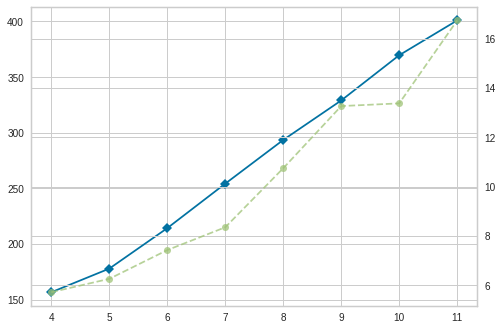

In [270]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y =  embedding_matrix, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff3eb110>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

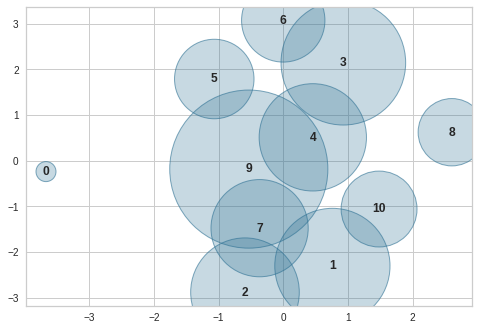

In [315]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
X, y = embedding_matrix, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(11)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff8ae7d0>,
                     model=None)

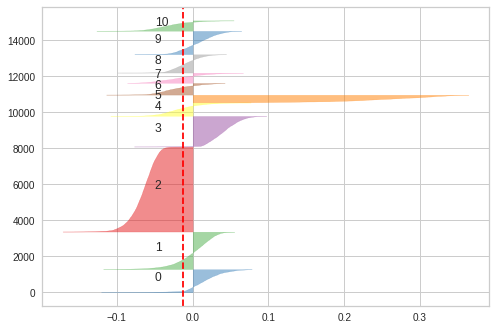

In [316]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(11)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 2. Abstract - Project Objective Word Embeddings Clustering

In [273]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['project_objective']))  # Generate tokens by counting frequency

In [274]:
sequences2 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['project_objective']))

In [275]:
word_index2 = clust_tokenizer.word_index
word_index2

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'in': 5,
 'to': 6,
 'a': 7,
 'with': 8,
 'for': 9,
 'is': 10,
 'that': 11,
 'we': 12,
 'will': 13,
 'by': 14,
 'on': 15,
 'as': 16,
 'this': 17,
 'are': 18,
 'from': 19,
 'be': 20,
 'an': 21,
 'climate': 22,
 'at': 23,
 'br': 24,
 '1': 25,
 'these': 26,
 'patients': 27,
 'were': 28,
 'new': 29,
 'disease': 30,
 'or': 31,
 'clinical': 32,
 '0': 33,
 'was': 34,
 'model': 35,
 'which': 36,
 'based': 37,
 '2': 38,
 'using': 39,
 'our': 40,
 'between': 41,
 'research': 42,
 'high': 43,
 'have': 44,
 'liver': 45,
 'models': 46,
 'results': 47,
 'data': 48,
 'has': 49,
 'can': 50,
 'af': 51,
 'study': 52,
 'associated': 53,
 'not': 54,
 'but': 55,
 'risk': 56,
 'also': 57,
 'their': 58,
 '3': 59,
 'it': 60,
 'global': 61,
 'into': 62,
 'other': 63,
 'different': 64,
 'treatment': 65,
 'methods': 66,
 'approach': 67,
 'large': 68,
 'system': 69,
 'up': 70,
 'more': 71,
 'understanding': 72,
 'used': 73,
 'including': 74,
 'development': 75,
 'well'

In [276]:
# Make all sequences 200 words long
maxlen = 200

data2 = pad_sequences(sequences2, maxlen=maxlen)

# We have 25K, 200 word sequences now
print('New data shape: {}'.format(data2.shape))

New data shape: (752, 200)


In [277]:
embedding_matrix2 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11252 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c009dfed0>,
                 k=None, metric=None, model=None, timings=True)

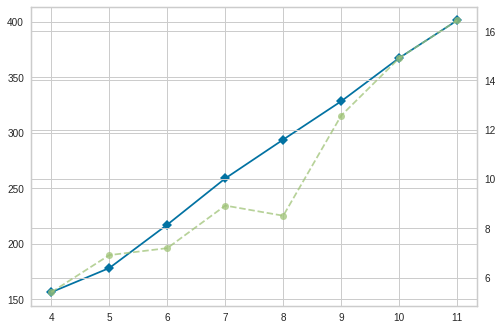

In [278]:
X, y =  embedding_matrix2, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffedd090>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

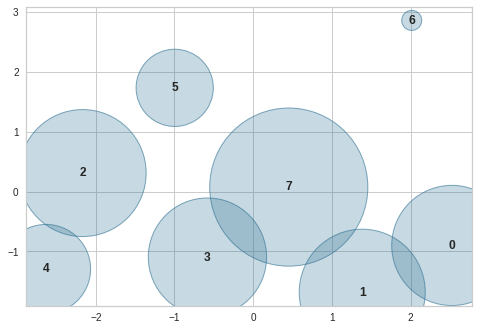

In [279]:
X, y = embedding_matrix2, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(8)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c008fb590>,
                     model=None)

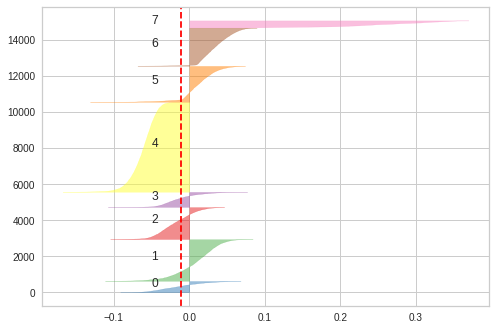

In [280]:
model = KMeans(8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 3. Abstract - EU Call Word Embeddings Clustering

In [281]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['EU_CALL']))  # Generate tokens by counting frequency
sequences3 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['EU_CALL']))
word_index = clust_tokenizer.word_index

maxlen = 200

data3 = pad_sequences(sequences3, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data3.shape))

embedding_matrix3 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11268 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c008a1890>,
                 k=None, metric=None, model=None, timings=True)

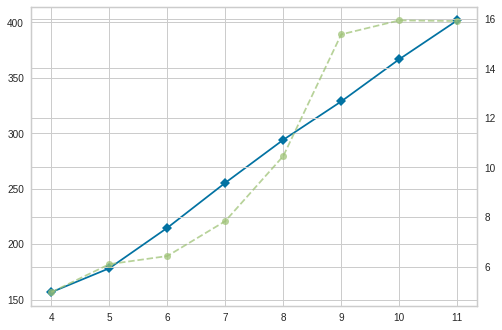

In [282]:
X, y =  embedding_matrix3, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c00742450>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

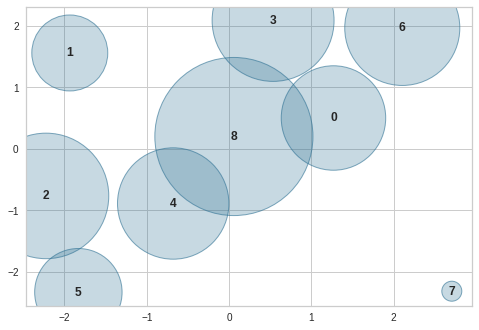

In [285]:

X, y = embedding_matrix3, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(9)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c00229b50>,
                     model=None)

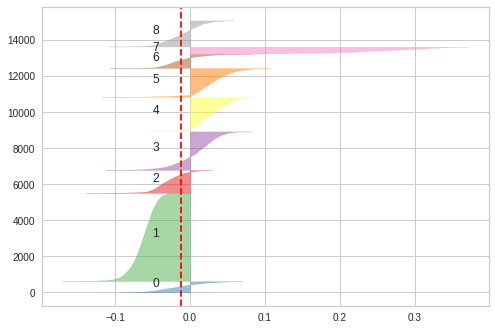

In [286]:
model = KMeans(9)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 4. Abstract - EU Call - Project Objective Word Embeddings Clustering

In [287]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] + cluster_data['EU_CALL'] + cluster_data['project_objective']))  # Generate tokens by counting frequency
sequences4 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] + cluster_data['EU_CALL']  +cluster_data['project_objective']))
word_index = clust_tokenizer.word_index

maxlen = 200

data4 = pad_sequences(sequences4, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data4.shape))

embedding_matrix4 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11281 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c004f4890>,
                 k=None, metric=None, model=None, timings=True)

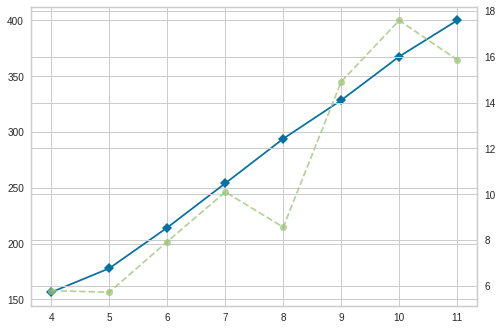

In [288]:
X, y =  embedding_matrix4, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0028fe10>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

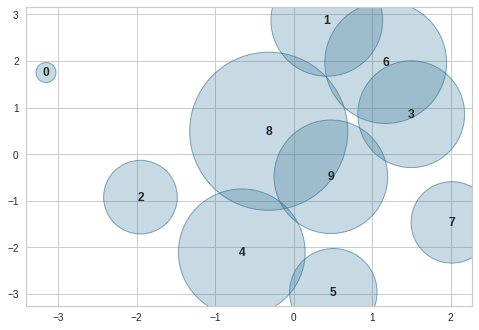

In [289]:
X, y = embedding_matrix4, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c00414c50>,
                     model=None)

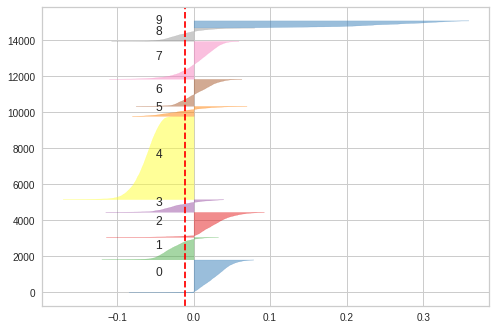

In [290]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 5. Abstract - Project Objective - Claim

In [291]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['project_objective'] + cluster_data['claim']))  # Generate tokens by counting frequency
sequences5 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['project_objective']+ cluster_data['claim']))
word_index = clust_tokenizer.word_index

maxlen = 200

data5 = pad_sequences(sequences5, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data5.shape))

embedding_matrix5 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11355 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c00397550>,
                 k=None, metric=None, model=None, timings=True)

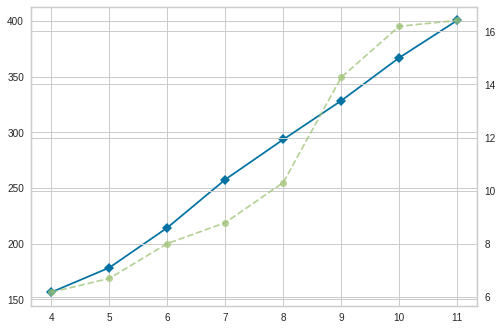

In [292]:
X, y =  embedding_matrix5, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff698f90>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

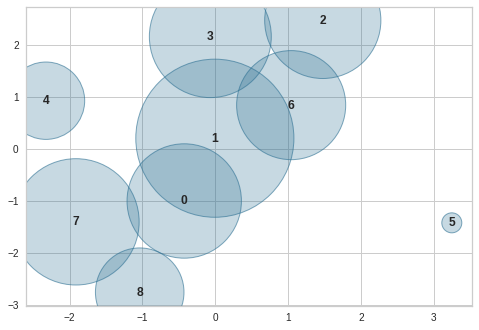

In [317]:
X, y = embedding_matrix5, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(9)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff555690>,
                     model=None)

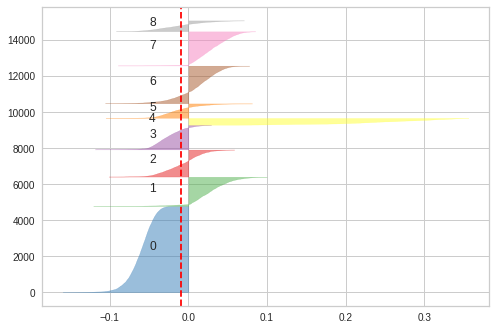

In [318]:
model = KMeans(9)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 6. Abstract - Project Objective - Claim/Evidence Word Embeddings Clustering

In [295]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['project_objective'] + cluster_data['claim_evidence']))  # Generate tokens by counting frequency
sequences6 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['project_objective'] + cluster_data['claim_evidence']))
word_index = clust_tokenizer.word_index

maxlen = 200

data6 = pad_sequences(sequences6, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data6.shape))

embedding_matrix6 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11368 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffff4090>,
                 k=None, metric=None, model=None, timings=True)

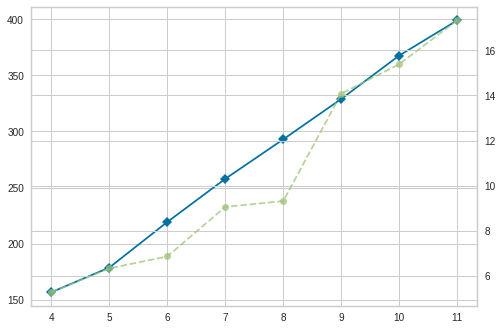

In [296]:
X, y =  embedding_matrix6, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffd90a10>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

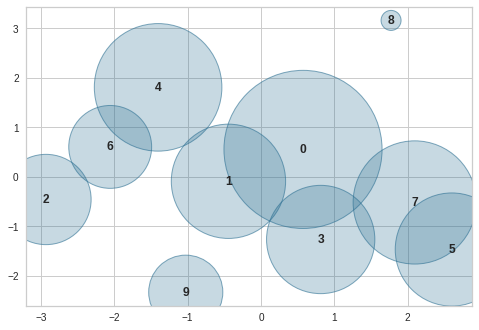

In [297]:
X, y = embedding_matrix6, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffb04850>,
                     model=None)

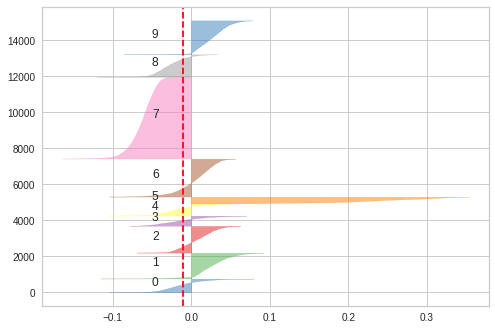

In [298]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 7. Abstract - EU Call - Claim Word Embeddings Clustering

In [299]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] + cluster_data['EU_CALL'] + cluster_data['claim']))  # Generate tokens by counting frequency
sequences7 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] + cluster_data['EU_CALL'] + cluster_data['claim']))
word_index = clust_tokenizer.word_index

maxlen = 200

data7 = pad_sequences(sequences7, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data7.shape))

embedding_matrix7 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11369 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffff4ad0>,
                 k=None, metric=None, model=None, timings=True)

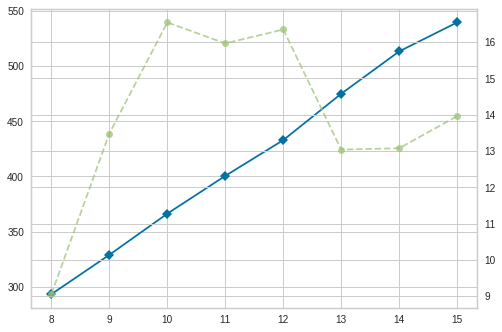

In [300]:
X, y =  embedding_matrix7, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(8,16))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bfff8c350>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

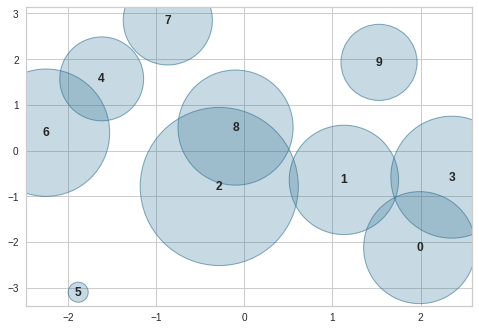

In [301]:
X, y = embedding_matrix7, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0047b3d0>,
                     model=None)

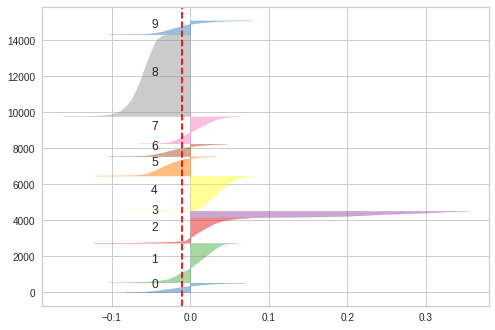

In [302]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 8. Abstract - EU Call - Claim/Evidence Word Emebeddings Clustering

In [303]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] + cluster_data['EU_CALL'] + cluster_data['claim_evidence']))  # Generate tokens by counting frequency
sequences8 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] + cluster_data['EU_CALL'] + cluster_data['claim_evidence']))
word_index = clust_tokenizer.word_index

maxlen = 200

data8 = pad_sequences(sequences8, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data8.shape))

embedding_matrix8 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11359 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cccf34290>,
                 k=None, metric=None, model=None, timings=True)

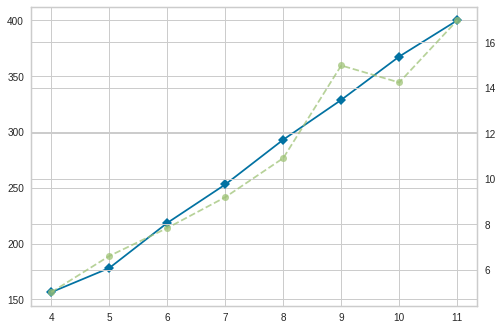

In [304]:
X, y =  embedding_matrix8, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2213ea90>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

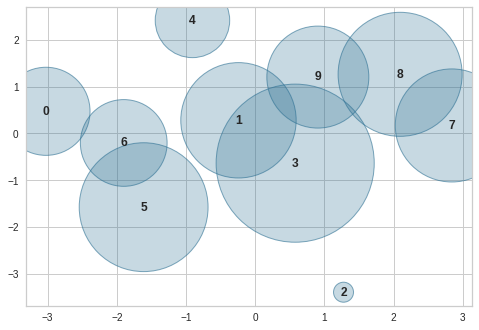

In [305]:
X, y = embedding_matrix8, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2213ed90>,
                     model=None)

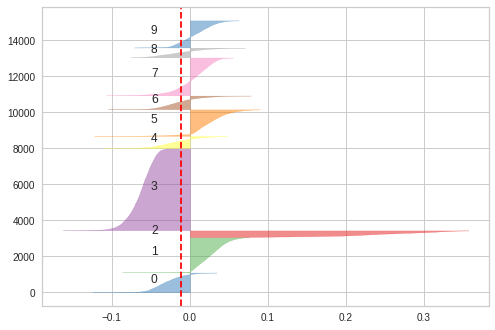

In [306]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 9. Abstract - Project Objective - EU Call - Claim Word Embeddings Clustering

In [307]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['project_objective'] + cluster_data['EU_CALL'] + cluster_data['claim']))  # Generate tokens by counting frequency
sequences9 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['project_objective'] + cluster_data['EU_CALL'] + cluster_data['claim']))
word_index = clust_tokenizer.word_index

maxlen = 200

data9 = pad_sequences(sequences9, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data9.shape))

embedding_matrix9 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11369 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff93f3d0>,
                 k=None, metric=None, model=None, timings=True)

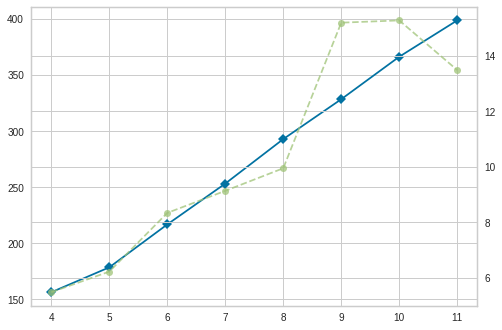

In [308]:
X, y =  embedding_matrix9, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff53b390>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

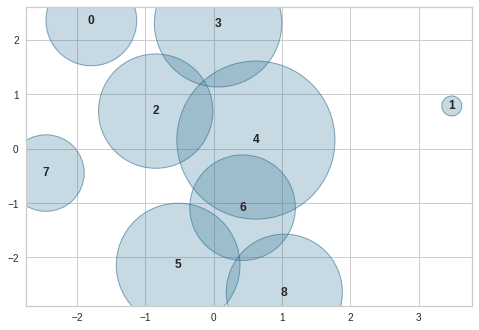

In [319]:
X, y = embedding_matrix9, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(9)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bff380d10>,
                     model=None)

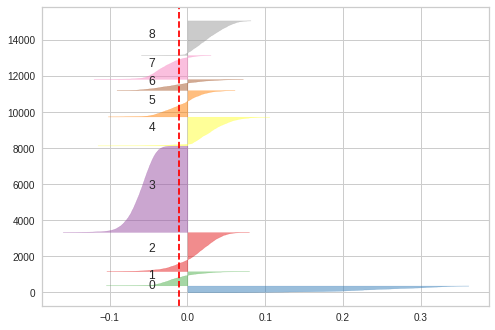

In [320]:
model = KMeans(9)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

> 10. Abstract - Project Objective - EU Call - Claim/Evidence Word Embeddings Clustering

In [311]:
clust_tokenizer.fit_on_texts((cluster_data['abstract'] +cluster_data['project_objective']))  # Generate tokens by counting frequency
sequences10 = clust_tokenizer.texts_to_sequences((cluster_data['abstract'] +cluster_data['project_objective']))
word_index = clust_tokenizer.word_index

maxlen = 200

data10 = pad_sequences(sequences10, maxlen=maxlen)

#We have 25K, 200 word sequences now
print('New data shape: {}'.format(data10.shape))

embedding_matrix10 = create_embeddings_matrix(emb_index=embeddings_index,
                                            tokenizer=clust_tokenizer,
                                            emb_dim=embedding_dim)

New data shape: (752, 200)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Embeddings AVG: -0.003905011573806405 | STD: 0.3817702829837799
Found 11369 pre-trained embeddings out of 15000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffe7e310>,
                 k=None, metric=None, model=None, timings=True)

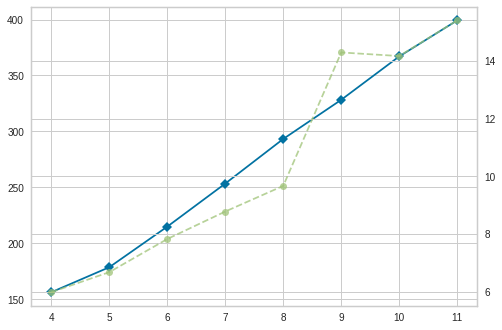

In [312]:
X, y =  embedding_matrix10, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bffd3ff10>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

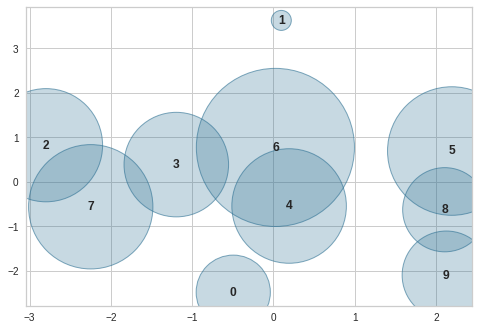

In [313]:
X, y = embedding_matrix10, embeddings_index

# Instantiate the clustering model and visualizer
model = KMeans(9)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bfeff4a10>,
                     model=None)

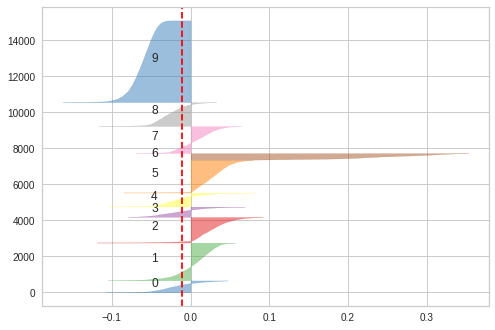

In [314]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer